<div style= "background-color: #f8f9fa; color: #333; padding: 15px;">
    <a class="anchor" id="1st-bullet"></a>
    <h3 style="color: #198754;font-weight: bold;">DATA MINING GROUP PROJECT</h3>
    <h2 style="color: #198754; font-weight: bold;">ABCDEats Inc. Final Report</h3>
    <h3 style="color: #198754;">Group 20</h3>
    Afonso Gamito, 20240752 <br>
    Gonçalo Pacheco, 20240695<br>
    Hassan Bhatti, 20241023<br>
    Moeko Mitani, 20240670 <br>
</div>

# Index

- [Import the Libraries and CVS file](#1) 
- [1. Check The Dataset](#2)
    - [1.1. Metadata](#3)
    - [1.2. Issues in The Dataset](#4)
- [2. Data Visualization](#5)
- [3. Key Statistics and Trends](#6)
- [4. Data Pre-Processing 1](#7)
    - [4.1. Treat Missing Values](#8)
    - [4.2. Change dtypes](#9)
    - [4.3. Treat Duplicates](#10)
- [5. Outliers](#11) 
- [6. New Features Creation](#12)
    - [6.1. Regional Demographic](#13)
    - [6.2. Total Orders](#14)
    - [6.3. Total Orders](#15)
    - [6.4. Average Purchase](#16)
    - [6.5. Customer Ordering Level](#17)
    - [6.6. Customer Preferences](#18)
    - [6.7. Day as Client](#19)
- [7. Data Pre-Processing 2](#20)
- [8. Feature Selection](#21)


<a class="anchor" id="1">     

# Import the Libraries and CVS file

</a>    

In [1]:
# Libraries
import pandas as pd
import sqlite3
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.feature_selection import VarianceThreshold
from math import ceil
from itertools import product

In [2]:
# Import CVS file
file_path = 'project_data/DM2425_ABCDEats_DATASET.csv'
df = pd.read_csv(file_path)

<a class="anchor" id="2">     

# 1. Check The Dataset
</a>    

<a class="anchor" id="3">     

## 1.1. Metadata
</a>    

The training set contains the customer data from ABCDEats Inc. collected over three months from three cities.

| Feature | Feature description |
|---------|---------------------|
| *customer_id* | Unique identifier for each customer.|
| *customer_region* | Geographic region where the customer is located.|
| *customer_age* | Age of the customer.|
| *vendor_count* | Number of unique vendors the customer has ordered from.|
| *product_count* | Total number of products the customer has ordered.|
| *is_chain* | Indicates whether the customer’s order was from a chain restaurant.|
| *first_order* | Number of days from the start of the dataset when the customer first placed an order.|
| *last_order* | Number of days from the start of the dataset when the customer most recently placed an order.|
| *last_promo* | The category of the promotion or discount most recently used by the customer.|
| *payment_method* | Method most recently used by the customer to pay for their orders.|
| *CUI_American* | The amount in monetary units spent by the customer from the American cuisine.|
| *CUI_Asian* | The amount in monetary units spent by the customer from the Asian cuisine.|
|*CUI_Beverages* | The amount in monetary units spent by the customer from the Beverages|
| *CUI_Cafe* | The amount in monetary units spent by the customer from the Cafe.|
| *CUI_Chicken Dishes* | The amount in monetary units spent by the customer from the Chicken Dishes.|
| *CUI_Chinese* | The amount in monetary units spent by the customer from the Chinese cuisine.|
| *CUI_Desserts* | The amount in monetary units spent by the customer from the Desserts.|
| *CUI_Healthy* | The amount in monetary units spent by the customer from the Healthy cuisine.|
| *CUI_Indian* | The amount in monetary units spent by the customer from the Indian cuisine.|
| *CUI_Italian* | The amount in monetary units spent by the customer from the Italian cuisine.|
| *CUI_Japanese* | The amount in monetary units spent by the customer from the Japanese cuisine.|
| *CUI_Noodle Dishes* | The amount in monetary units spent by the customer from the Noodle Dishes.|
| *CUI_OTHER* | The amount in monetary units spent by the customer from the Other cuisine.|
| *CUI_Street Food / Snacks* | The amount in monetary units spent by the customer from the Street Food / Snacks.|
| *CUI_Thai* | The amount in monetary units spent by the customer from the Thai cuisine.|
| *DOW_0* | Number of orders placed on each day of Sunday.|
| *DOW_1* | Number of orders placed on each day of Monday.|
| *DOW_2* | Number of orders placed on each day of Tuesday.|
| *DOW_3* | Number of orders placed on each day of Wednesday.|
| *DOW_4* | Number of orders placed on each day of Thursday.|
| *DOW_5* | Number of orders placed on each day of Friday.|
| *DOW_6* | Number of orders placed on each day of Saturday.|
| *HR_0* | Number of orders placed during 12AM.|
| *HR_1* | Number of orders placed during 1AM.|
| *HR_2* | Number of orders placed during 2AM.|
| *HR_3* | Number of orders placed during 3AM.|
| *HR_4* | Number of orders placed during 4AM.|
| *HR_5* | Number of orders placed during 5AM.|
| *HR_6* | Number of orders placed during 6AM.|
| *HR_7* | Number of orders placed during 7AM.|
| *HR_8* | Number of orders placed during 8AM.|
| *HR_9* | Number of orders placed during 9AM.|
| *HR_10* | Number of orders placed during 10AM.|
| *HR_11* | Number of orders placed during 11AM.|
| *HR_12* | Number of orders placed during 12PM.|
| *HR_13* | Number of orders placed during 1PM.|
| *HR_14* | Number of orders placed during 2PM.|
| *HR_15* | Number of orders placed during 3PM.|
| *HR_16* | Number of orders placed during 4PM.|
| *HR_17* | Number of orders placed during 5PM.|
| *HR_18* | Number of orders placed during 6PM.|
| *HR_19* | Number of orders placed during 7PM.|
| *HR_20* | Number of orders placed during 8PM.|
| *HR_21* | Number of orders placed during 9PM.|
| *HR_22* | Number of orders placed during 10PM.|
| *HR_23* | Number of orders placed during 11PM.|

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [6]:
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,

In [7]:
df.describe(include = "object")

,customer_id,customer_region,last_promo,payment_method
count,31888,31888,31888,31888
unique,31875,9,4,3
top,742ca068fc,8670,-,CARD
freq,2,9761,16748,20161


<a class="anchor" id="4">     

## 1.2. Issues in the dataset
</a>    

**Missing Values**
- **'customer_age'**: 727 (NaN)
- **'first_order'**: 106 (NaN)
- **'HR_0'**: 1165 (NaN)
- **'customer_region'**: 442 (-)
- **'last_promo'**: 16748 (-)

**Wrong dtypes**
- **'customer_age'** should be int instead of float
- **'vendor_count'** should be bool instead of int (conflict with Metadata)
- **'first_order'** should be int instead of float
- **'HR_0'** should be int instead of float

**Duplicates**
- 13 duplicates

<a class="anchor" id="5">     

# 2. Data Visualization
</a>    

We do not apply changes directly to our dataset, thus we are going to make its copy.

In [8]:
df_copy = df.copy()

## Histograms: *customer_age* and *vender_count*

### Remarks:
- The majority of food delivery customers fall within the younger demographic range, predominantly between the ages of 20s and early 30s.
- Most of the customers have ordered from less than four vendors in three months.


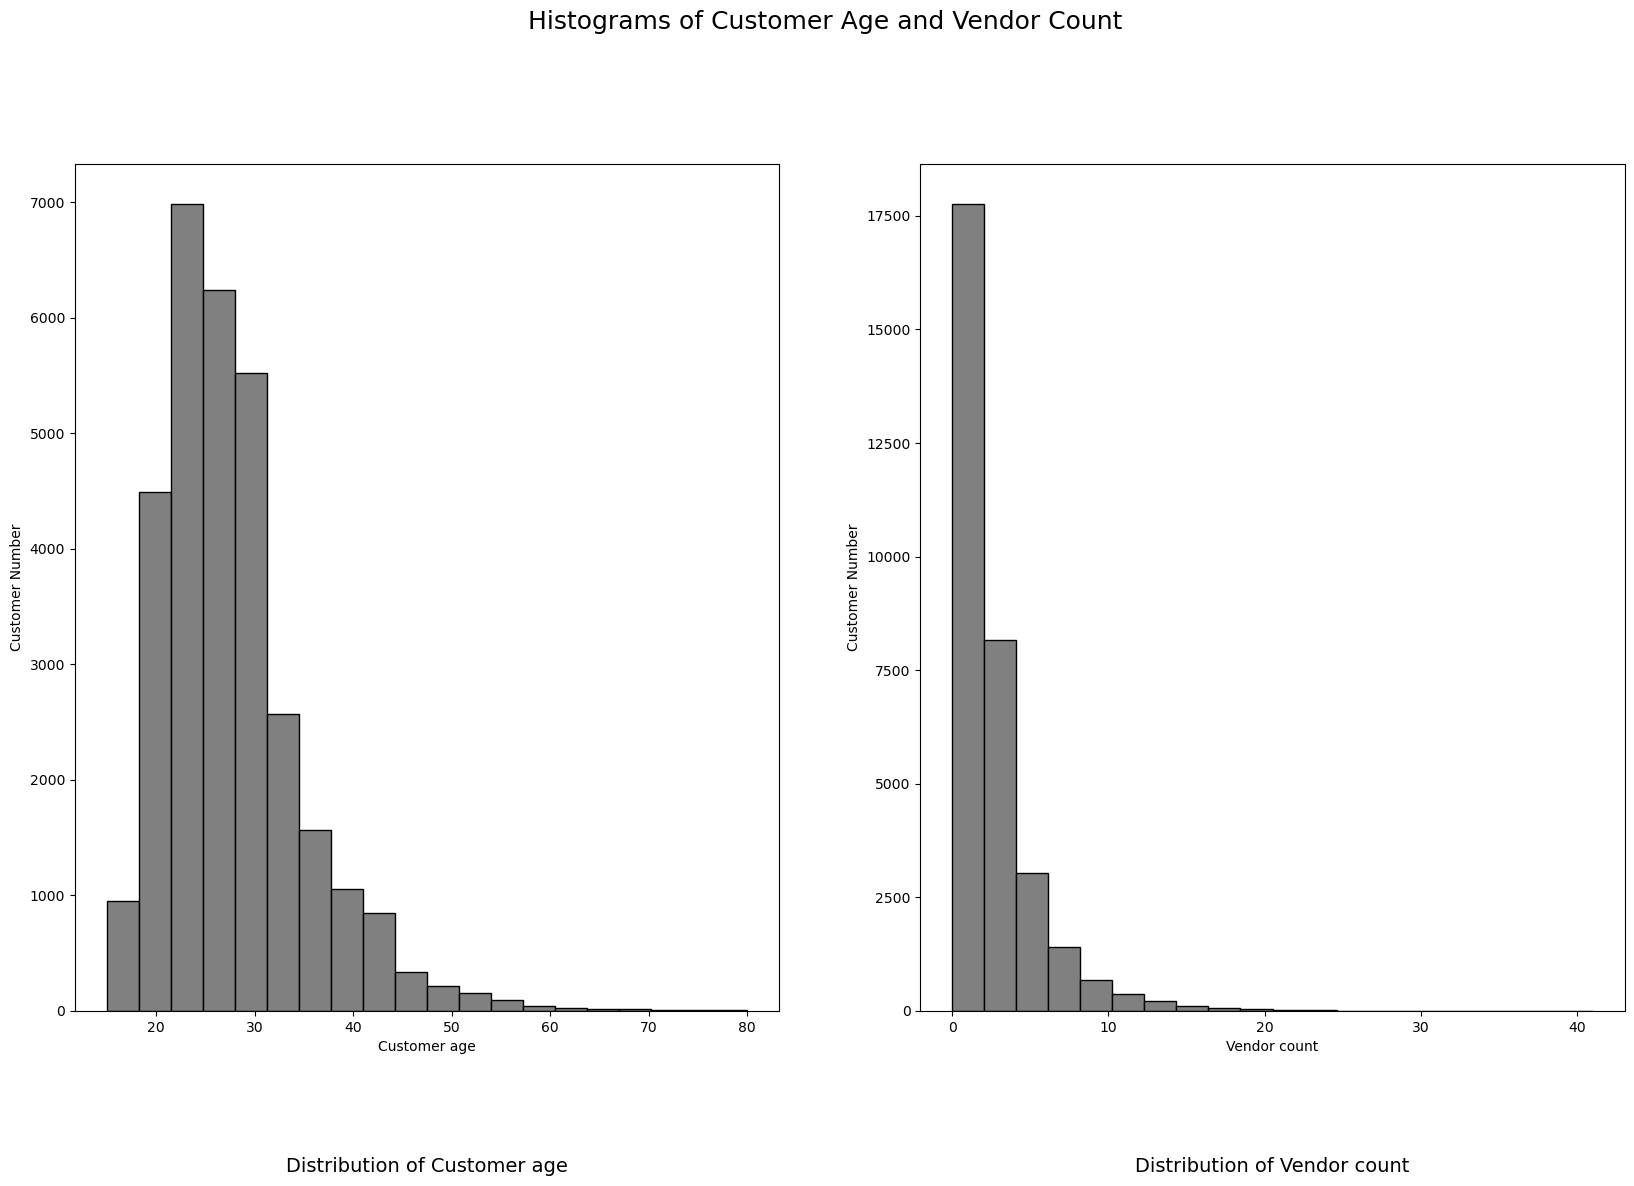

In [9]:
sp_rows = 1
sp_cols = 2

# Prepare figure and create individual axes for each histogram
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Plot data for 'customer_age' and 'vendor_count'
# Iterate over each axis and feature to plot histograms
for ax, feature in zip(axes.flatten(), ['customer_age', 'vendor_count']):
    # Plot histogram in shades of grey for each feature
    ax.hist(df_copy[feature].dropna(), bins=20, color='grey', edgecolor='black')
    ax.set_title(f'Distribution of {feature.capitalize().replace("_", " ")}', fontsize=14, y=-0.2)
    ax.set_xlabel(feature.capitalize().replace("_", " "))
    ax.set_ylabel("Customer Number")

plt.suptitle("Histograms of Customer Age and Vendor Count", fontsize=18, y=1.02)

# Ensure the directory exists for saving the figure
save_dir = os.path.join('..', 'figures', 'eda')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the figure as PNG
plt.savefig(os.path.join(save_dir, 'customer_age_vendor_count_histograms.png'), dpi=200, bbox_inches='tight')

plt.show()

## Histograms: **Day as Client**
### Remarks
- It can be observed that most of the customers stayed with us for less than 5 days.


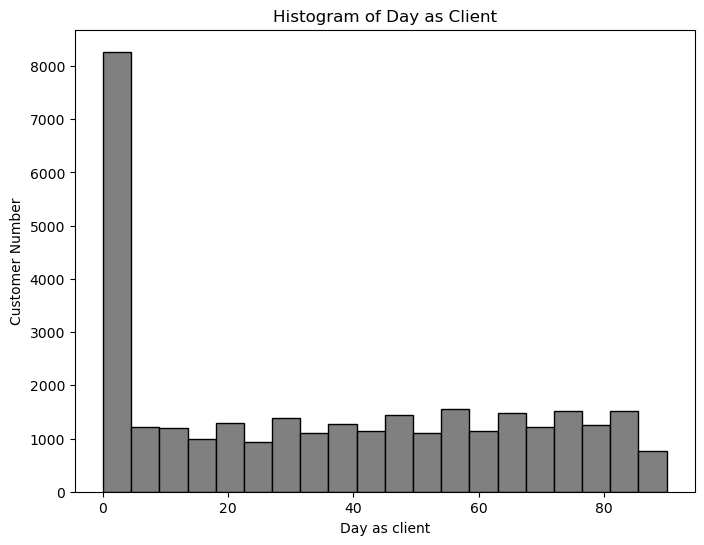

In [10]:
# Calculate the difference in the copy
df_copy['day_as_client'] = df_copy['last_order'] - df_copy['first_order']

plt.figure(figsize=(8, 6))
plt.hist(df_copy['day_as_client'], bins=20, color='gray', edgecolor='black')
plt.title('Histogram of Day as Client')
plt.xlabel('Day as client')
plt.ylabel('Customer Number')
plt.show()

## Bar Chart: **Total Orders per Hour**

### Remarks
- It can be observed that high demand occurs from 10:00 to 12:00 and 16:00 to 18:00.

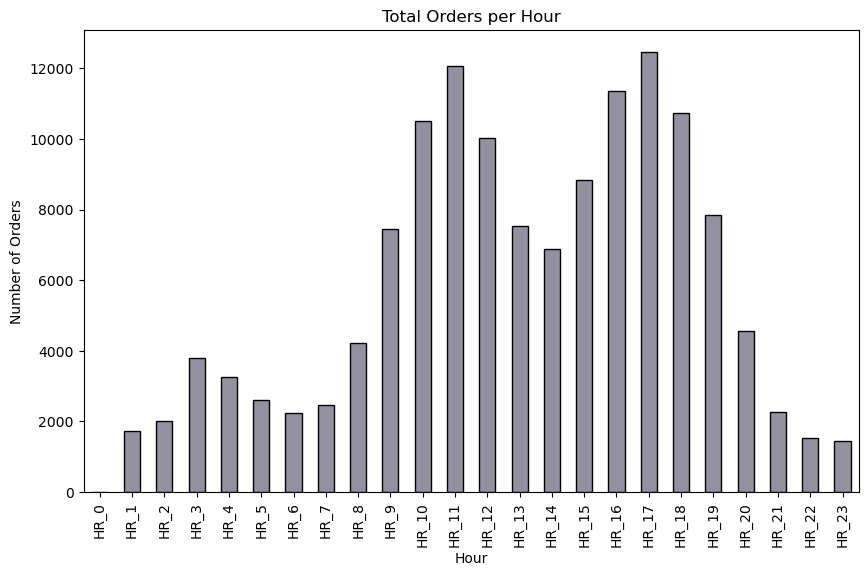

In [11]:
# Selecting columns related to each hour (HR_0 to HR_23)
hour_columns = [f'HR_{i}' for i in range(24)]

# Calculating total orders for each hour by summing across all rows for each hour column
total_orders_per_hour = df_copy[hour_columns].sum()

# Creating a bar plot to visualize total orders per hour in shades of grey
plt.figure(figsize=(10, 6))
total_orders_per_hour.plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders per Hour') 
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

## Bar Chart: **Total Orders per Day of the Week**

### Remarks
- There is a peak in food orders on Thursdays (DOW_4) and Saturdays (DOW_6).

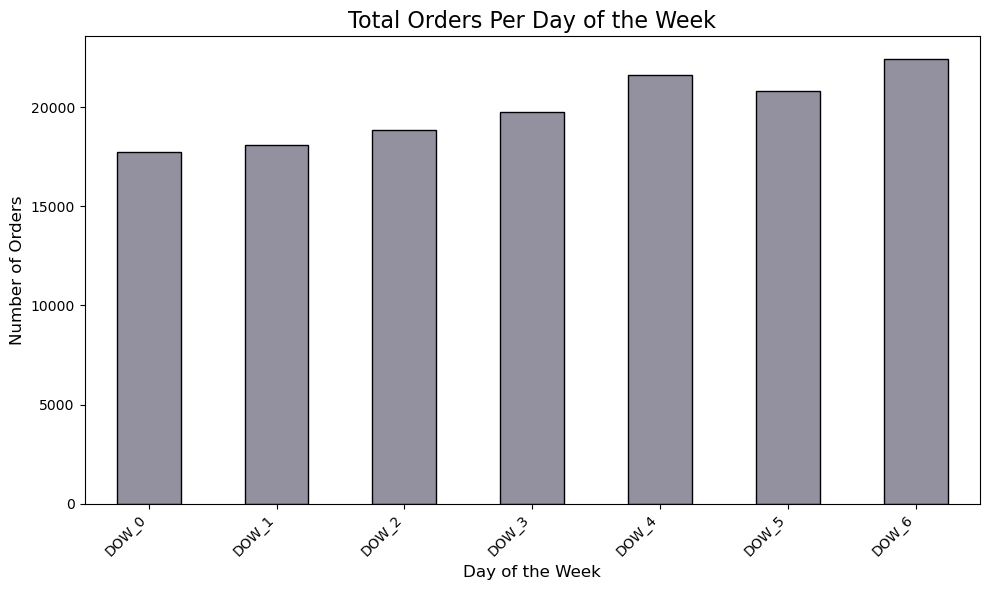

In [12]:
# Selecting columns for days of the week (DOW_0 to DOW_6)
dow_columns = [f'DOW_{i}' for i in range(7)]

# Calculating total orders for each day of the week by summing across all rows for each day column
total_orders_per_dow = df_copy[dow_columns].sum()

# Creating a bar chart to visualize total orders per day of the week in grey scale
plt.figure(figsize=(10, 6))
total_orders_per_dow.plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders Per Day of the Week', fontsize=16) 
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

## Bar chart: **Total Orders per Cuisine**

### Remarks
- Asian, American and Street food / snacks can be considered as the most popular choices.

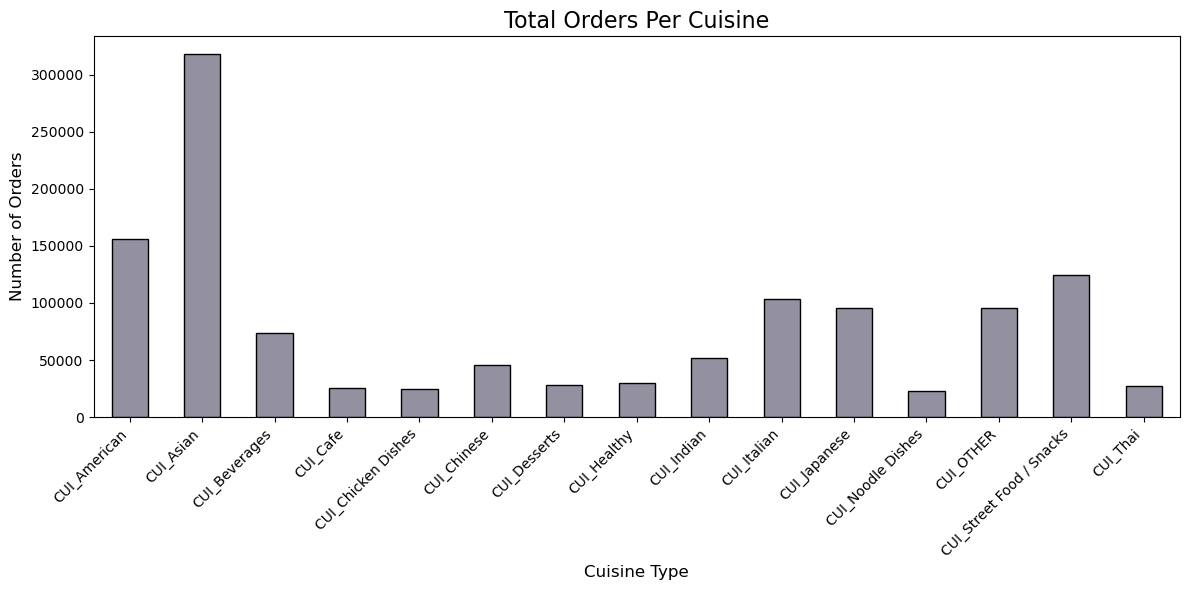

In [13]:
# Selecting columns related to cuisines (CUI_American, CUI_Asian, etc.)
cuisine_columns = [col for col in df_copy.columns if 'CUI_' in col]

# Summing total number of orders per cuisine
df_copy['total_orders_per_cuisine'] = df_copy[cuisine_columns].sum(axis=1)

# Creating a bar chart to visualize total orders per cuisine in grey scale
plt.figure(figsize=(12, 6))
df_copy[cuisine_columns].sum().plot(kind='bar', color="#9391A0", edgecolor='black')
plt.title('Total Orders Per Cuisine', fontsize=16) 
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

## Bar Chart: **Average Purchases per Order by Cuisine**

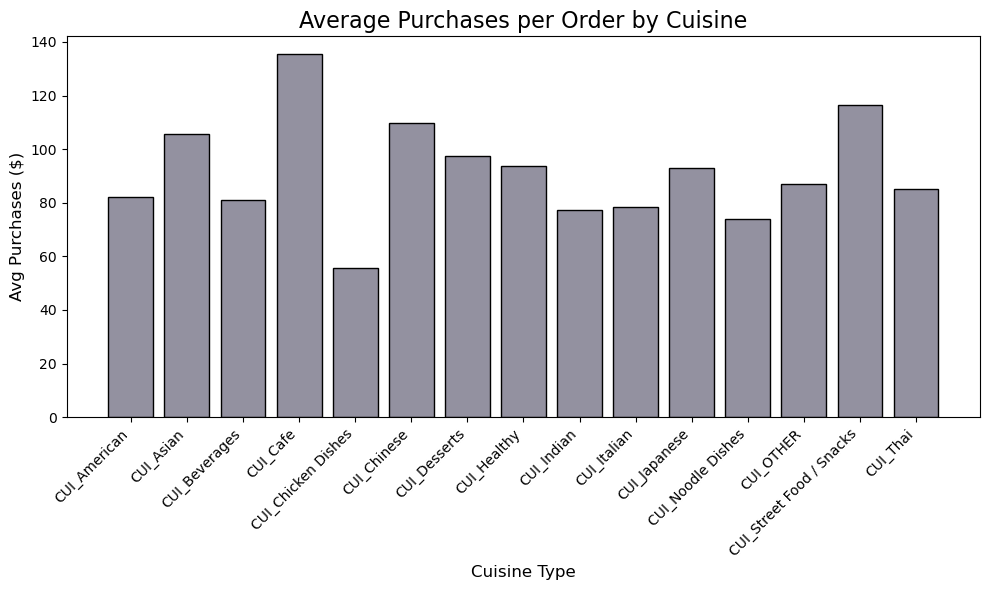

In [14]:
# Check if 'total_revenue' exists; if not, create it by summing across cuisine columns
if 'total_revenue' not in df_copy.columns:
    # Calculate total revenue for each row
    df_copy['total_revenue'] = df_copy[cuisine_columns].sum(axis=1)  

# Calculate Avg_Purchases for each cuisine
# Multiply the number of purchases by total revenue, then sum and divide by total purchases for each cuisine
avg_purchases = (df_copy[cuisine_columns].multiply(df_copy['total_revenue'], axis=0)).sum() / df_copy[cuisine_columns].sum()

# Plot Avg_Purchases as a bar chart
plt.figure(figsize=(10, 6))  
plt.bar(cuisine_columns, avg_purchases, color="#9391A0", edgecolor='black')  

plt.title('Average Purchases per Order by Cuisine', fontsize=16)  
plt.xlabel('Cuisine Type', fontsize=12)  
plt.ylabel('Avg Purchases ($)', fontsize=12)  
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()  

## Bar Chart: **Total Orders by Customer Region**

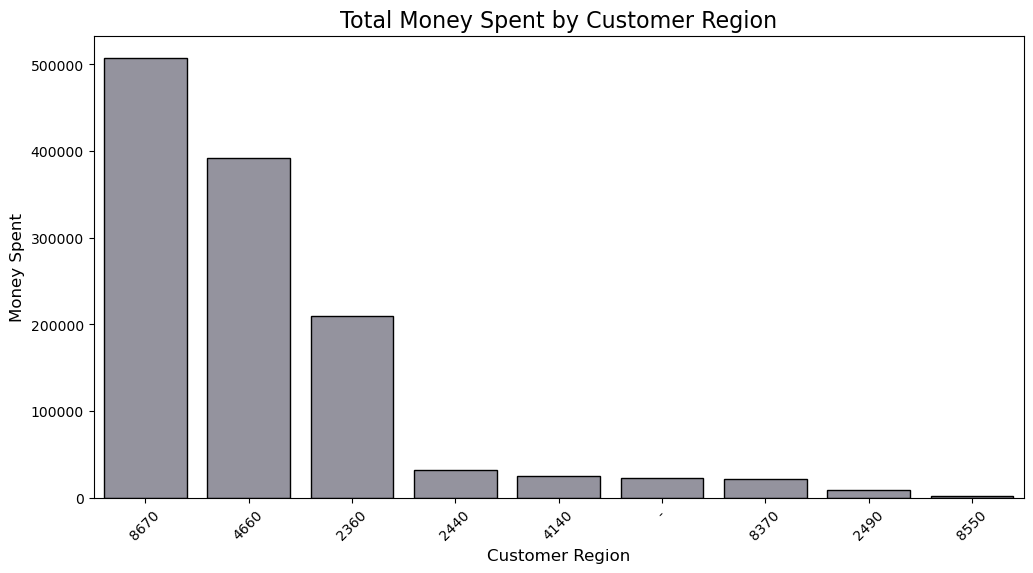

In [15]:
# List of all cuisine columns, including the combined CUI_OTHER
cuisine_columns = [col for col in df_copy.columns if 'CUI_' in col] 

# Calculate total orders by summing across all cuisine columns
df_copy['money_spent'] = df_copy[cuisine_columns].sum(axis=1)

# Group data by customer region and calculate total orders for each region
region_orders = df_copy.groupby('customer_region')['money_spent'].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(12, 6))  
sns.barplot(x=region_orders.index, y=region_orders.values, color='#9391A0', edgecolor='black')  
plt.title('Total Money Spent by Customer Region', fontsize=16)  
plt.xlabel('Customer Region', fontsize=12)  
plt.ylabel('Money Spent', fontsize=12)  
plt.xticks(rotation=45) 
plt.show()  

## Bar Chart: **Total Orders by Customer Region and Cuisine Type**

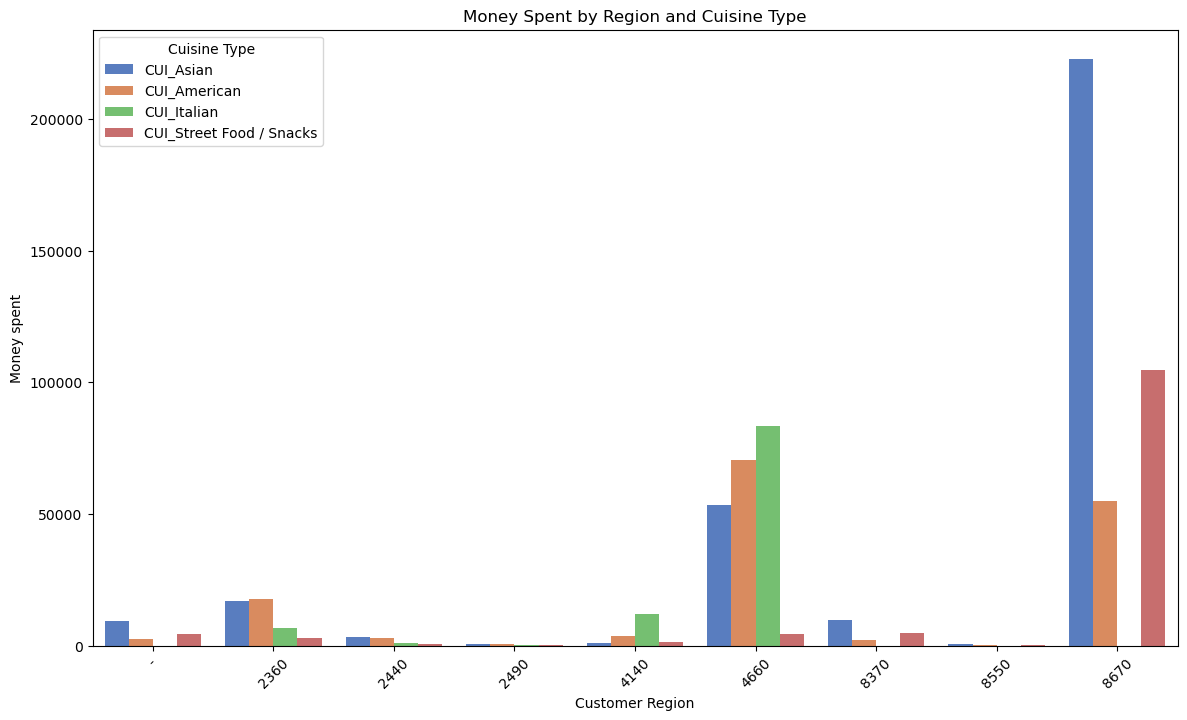

In [16]:
# Summing total orders by cuisine and region
cuisine_columns = ['CUI_Asian', 'CUI_American', 'CUI_Italian', 'CUI_Street Food / Snacks']
money_spent_by_region = df_copy.groupby('customer_region')[cuisine_columns].sum()

# Resetting the index for plotting
money_spent_by_region = money_spent_by_region.reset_index()

# Melt the DataFrame to get a long-form version suitable for seaborn
money_spent_by_region_melted = money_spent_by_region.melt(id_vars='customer_region', 
                                                          value_vars=cuisine_columns, 
                                                          var_name='Cuisine', 
                                                          value_name='money_spent')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=money_spent_by_region_melted, x='customer_region', y='money_spent', hue='Cuisine', palette="muted")
plt.title('Money Spent by Region and Cuisine Type')
plt.xlabel('Customer Region')
plt.ylabel('Money spent')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Type')
plt.show()


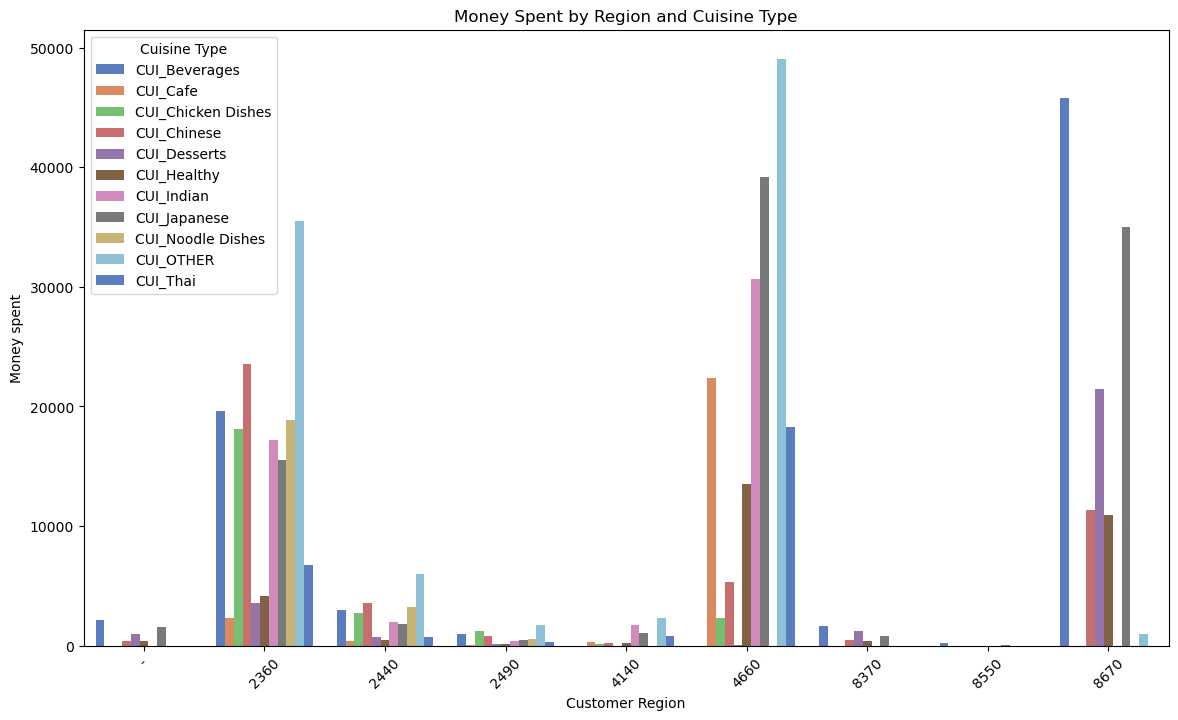

In [17]:
# Summing total orders by cuisine and region
cuisine_columns = ['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Thai']
money_spent_by_region = df_copy.groupby('customer_region')[cuisine_columns].sum()

# Resetting the index for plotting
money_spent_by_region = money_spent_by_region.reset_index()

# Melt the DataFrame to get a long-form version suitable for seaborn
money_spent_by_region_melted = money_spent_by_region.melt(id_vars='customer_region', 
                                                          value_vars=cuisine_columns, 
                                                          var_name='Cuisine', 
                                                          value_name='money_spent')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=money_spent_by_region_melted, x='customer_region', y='money_spent', hue='Cuisine', palette="muted")
plt.title('Money Spent by Region and Cuisine Type')
plt.xlabel('Customer Region')
plt.ylabel('Money spent')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Type')
plt.show()


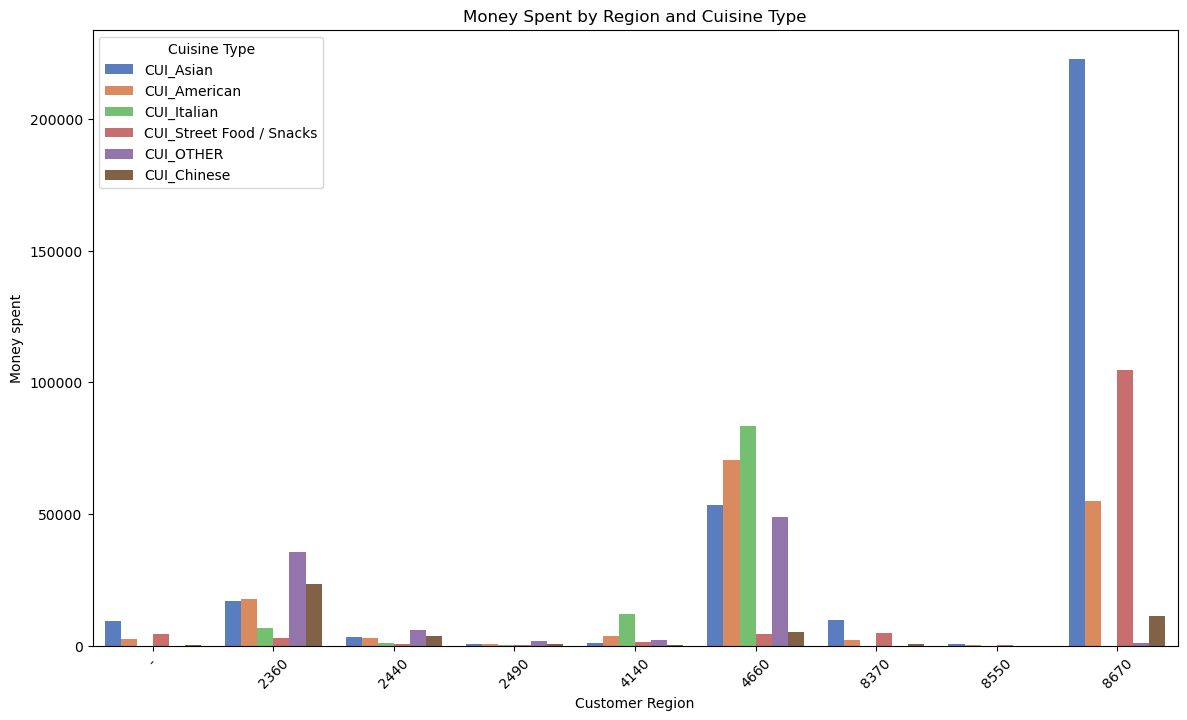

In [18]:
# Summing total orders by cuisine and region
cuisine_columns = ['CUI_Asian', 'CUI_American', 'CUI_Italian', 'CUI_Street Food / Snacks', 'CUI_OTHER', 'CUI_Chinese']
money_spent_by_region = df_copy.groupby('customer_region')[cuisine_columns].sum()

# Resetting the index for plotting
money_spent_by_region = money_spent_by_region.reset_index()

# Melt the DataFrame to get a long-form version suitable for seaborn
money_spent_by_region_melted = money_spent_by_region.melt(id_vars='customer_region', 
                                                          value_vars=cuisine_columns, 
                                                          var_name='Cuisine', 
                                                          value_name='money_spent')

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=money_spent_by_region_melted, x='customer_region', y='money_spent', hue='Cuisine', palette="muted")
plt.title('Money Spent by Region and Cuisine Type')
plt.xlabel('Customer Region')
plt.ylabel('Money spent')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Type')
plt.show()


<a class="anchor" id="6">     

# 3. Key Statisctics and Trend
</a>    

## Remarks from first delivery

### Key Statistics
- **Customer Age**: The mean of 'customer_age' is 27.5. 25% of the customers are 23 or younger, and 75% are 32 or younger. Thus, it can be conluded that young people tend to use our food delivery service.
- **Vender Number**: The mean of 'vendor_count' is 3.1. 25% of the customers have ordered from 1 vendor, 50% have ordered from 2 vendors, and 75% have ordered from 4 vendors. Thus, it can be concluded that most of the customers have ordered from less than 4 vendors in 3 months.
- **Product Number**: The mean of 'product_count' is 5.67. 25% of the customers have ordered 2 products, 50% have ordered 3 products, and 75% have ordered 7 products in 3 months. There is a high standard deviation of 6.96, reflecting significant variability in order volume.
- **Payment Methods**: Most customers pay by card rather than by cash or digital.
- **Order Numbers per Regions**: The region with the highest number of orders was 8670, followed by 4660 and 2360, far ahead of the other regions. The region 8670 had the highest number of unique customers who placed orders, followed by 4660 and 2360.

### Key Decisions
- **Chain Restaurant Number**: DISAGREE WITH METADATA. The values should be converted to boolean in the next process.
- **Date of First Order and Last Order**: We decided to creat new feature .
- **Customer Region**: There are 8 different regions. There should be 3 cities instead, so it seems like they are postal codes. Then we can categorize them into 3 groups (cities): city A (2360, 2440 and 2490), city B (4660 and 4140), and city C (8670, 8370 and 8550) in the next process.

### Trends
- **Young Customers**: The majority of food delivery customers fall within the younger demographic range, predominantly between the ages of 18 and 32.
- **Payment by Card**: Most customers pay by card rather than by cash or digital.
- **Popular Cuisine**: American and Asian dishes emerge as the most popular choices.
- **Popular Cuisine per Regions**: Asian cuisine is the most popular in region 8670, while Italian cuisine leads in region 4660. This trend is consistent across other city regions, though with significant variation in total order volumes. In region 4140, however, the popularity of these cuisines is less pronounced compared to the two largest regions. City A shows greater diversity in cuisine preferences than the other two cities.
- **Busier Day of The Week**: Peak food ordering on Thursdays (DOW_4) and Saturdays (DOW_6).
- **Busier Hours**: High demand occurs from 10:00 AM to 12:00 PM and 4:00 PM to 6:00 PM.
- **Customer Frequency**: Most of the customers stay for two to three days, this short engagement period suggests that customers may use the service sporadically rather than consistently over extended periods.

<a class="anchor" id="7">     

# 4. Data Pre-Processing 1
</a>    

<a class="anchor" id="8">     

## 4.1. Treat Missing Values
</a>    

## Remarks from first delivery
[Missing values]
- **'customer_age'**: 727 (NaN)
- **'first_order'**: 106 (NaN)
- **'HR_0'**: 1165 (NaN)
- **'customer_region'**: 442 (-)
- **'last_promo'**: 16748 (-) --> <font color='red'>Exaggerated number of missing values</font>

In [19]:
df.shape

(31888, 56)

In [20]:
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [21]:
df[["customer_age", "first_order", "HR_0"]].var()

customer_age     51.278464
first_order     581.248008
HR_0              0.000000
dtype: float64

In [22]:
# Check customer_region
df["customer_region"].value_counts()

customer_region
8670    9761
4660    9550
2360    8829
2440    1483
4140     857
8370     495
2490     445
-        442
8550      26
Name: count, dtype: int64

In [23]:
# Check last_promo
df["last_promo"].value_counts()

last_promo
-           16748
DELIVERY     6286
DISCOUNT     4496
FREEBIE      4358
Name: count, dtype: int64

We have decided to fill missing values in the feature: 
- **'customer_age'**: with its median because the data is skewed.
- **'first_order'**: with its median because the data is skewed.
- **'HR_0'** with 0 because it is the only value it has.
- **'customer_region'** with 8000. From the visualization, "-" seems like to be able to be considered as City C (starting with 8000). Thus, we can fill the missing value "-" with "8000" for now since we will merge it with "8670", "8370" and "8550".
- **'last_promo'**: with "Unknown" for now. We might frop the feature itself later.

In [24]:
# Fill missing values in customer age with its median
df["customer_age"] = df["customer_age"].fillna(df["customer_age"].median())

# Fill missing values in first_order with its median
df["first_order"] = df["first_order"].fillna(df["first_order"].median())

# Fill missing values in HR_0 with 0
df["HR_0"] = df["HR_0"].fillna(df["HR_0"].fillna(0))

# Fill missing values "-" in customer_region with 8000
df["customer_region"] = df["customer_region"].replace("-", 8000)

# Fill missing values "-" in last_prom with UNKNOWN
df["last_promo"] = df["last_promo"].replace("-", "UNKNOWN")

In [25]:
# replace "" by nans
df.replace("", np.nan, inplace=True)

# count of missing values
df.isna().sum()

customer_id                 0
customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1      

<a class="anchor" id="9">     

## 4.2. Change dtypes
</a>    

## Remarks
- **'customer_age'** should be int instead of float.
- **'is_chain'** should be bool instead of int because we agreed with METADATA.
- **'first_order'** should be int instead of float.
- **'HR_0'** should be int instead of float.

In [26]:
df["customer_age"] = df["customer_age"].astype("int")

df["first_order"] = df["first_order"].astype("int")

df["HR_0"] = df["HR_0"].astype("int")

We disagee with Metadata about *is_chain* feature. We decided to convert it into boolean. If the value = 0, that means False, True otherwise.

In [27]:
df["is_chain"].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80])

In [28]:
df["is_chain"] = df["is_chain"].astype("bool")

#Replace True with 1 and False with 0
df["is_chain"] = df["is_chain"].apply(lambda x: 1 if x else 0)

In [29]:
# Check dataset if all dtypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31888 non-null  int64  
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31888 non-null  int64  
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

<a class="anchor" id="10">     

## 4.3. Treat Duplicates
</a>    

In [30]:
# Check if there are duplicates in the dataset
df.duplicated().sum()

13

In [31]:
# Drop duplicates in the dataset
df.drop_duplicates(inplace=True)

In [32]:
# Check if all duplicates are dropped
df.duplicated().sum()

0

<a class="anchor" id="11">     

# 5. Outliers
</a>    

## Remarks
We have decided to each thresholds accoding to the boxplots visualization as follows:
- CUI_ features: 
    - CUI_American <= 150
    - CUI_Asian <= 300
    - CUI_Beverages <= 125
    - CUI_Cafe <= 125
    - CUI_Chicken Dishes <= 60
    - CUI_Chinese <= 150
    - CUI_Desserts <= 75
    - CUI_Healthy <= 80
    - CUI_Indian <= 110
    - CUI_Italian <= 160
    - CUI_Japanese <= 150
    - CUI_Noodle Dishes <= 75
    - CUI_OTHER <= 125
    - CUI_Street Food / Snacks <= 200
    - CUI_Thai <= 60
    
- HR_ features: We decided NOT TO remove the outliers in order to segment the customer regarding to the order time
- vendor_count feature: <= 30
- product_count feature: <= 100
- customer_age feature: We decided NOT TO remove the outliers in order to segment the customer regarding to the age

## Define metric and non-metric features

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31875 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31875 non-null  object 
 1   customer_region           31875 non-null  object 
 2   customer_age              31875 non-null  int64  
 3   vendor_count              31875 non-null  int64  
 4   product_count             31875 non-null  int64  
 5   is_chain                  31875 non-null  int64  
 6   first_order               31875 non-null  int64  
 7   last_order                31875 non-null  int64  
 8   last_promo                31875 non-null  object 
 9   payment_method            31875 non-null  object 
 10  CUI_American              31875 non-null  float64
 11  CUI_Asian                 31875 non-null  float64
 12  CUI_Beverages             31875 non-null  float64
 13  CUI_Cafe                  31875 non-null  float64
 14  CUI_Chicken

In [34]:
# Define the list of non-metric features
non_metric_features = [
    "customer_id", 
    "last_promo", 
    "payment_method"
]

# Extract metric features by excluding non-metric features from the DataFrame columns
metric_features = df.columns.drop(non_metric_features).to_list()

# Print the list of metric features
print(metric_features)

['customer_region', 'customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']


## Box Plots: CUI_ features for outliers

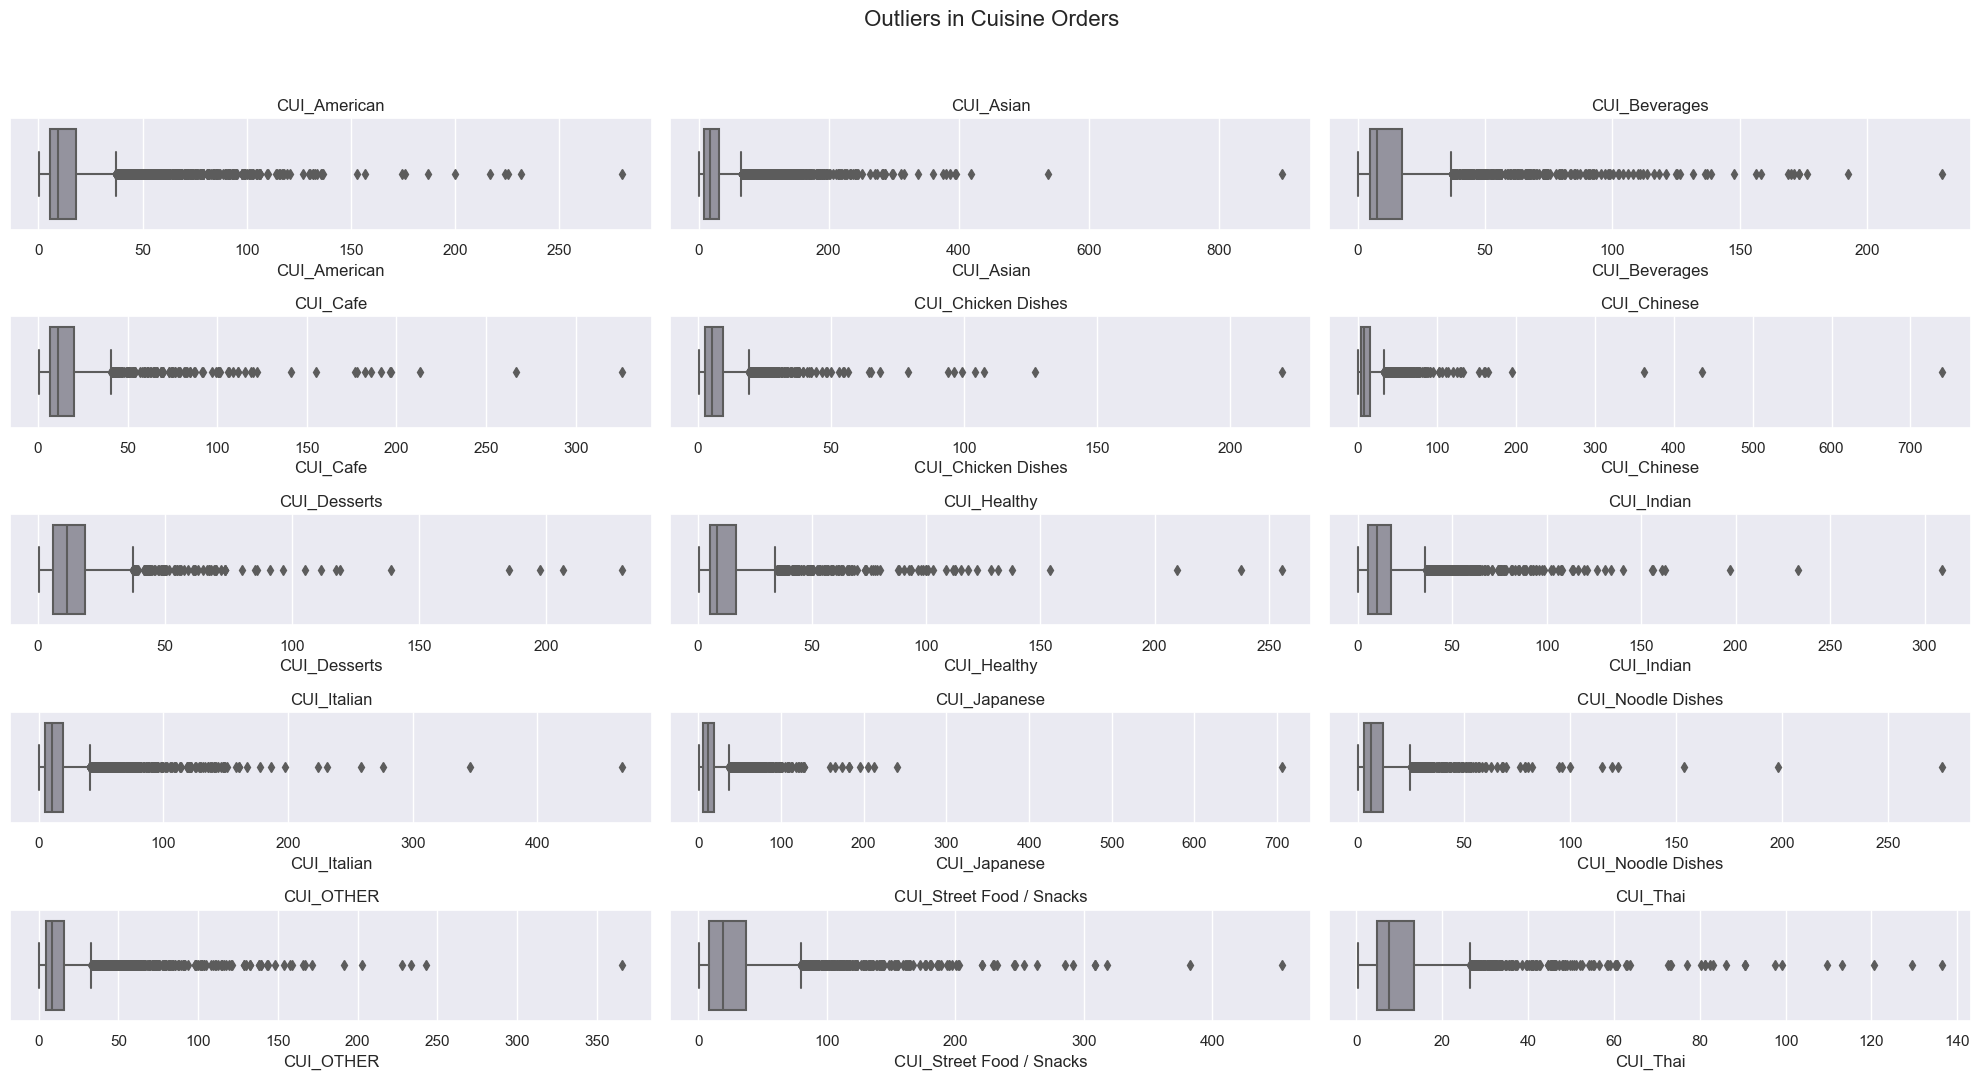

In [35]:
# List of features for which you want to plot boxplots
CUI_metric_features = [col for col in df.columns if 'CUI_' in col]

# Filter valid columns to avoid errors
valid_features = [feat for feat in CUI_metric_features if feat in df.columns]

# Set Seaborn style for better aesthetics
sns.set()

# Number of rows and columns in the subplot grid
sp_rows = 5
sp_cols = ceil(len(valid_features) / sp_rows)  # Calculate the number of columns needed

# Prepare figure and axes for subplots
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11)
                        )

# Flatten axes array in case it is 2D for easier iteration
axes = axes.flatten()

# Plot data: Iterate across axes and valid features
for ax, feat in zip(axes, valid_features):
    # Filter out 0s from the feature
    # Replace 0s with NaN (ignoring them in boxplot)
    data = df[feat].replace(0, float('nan')) 
    
    # Plot the boxplot only for non-zero values
    sns.boxplot(x=data, ax=ax, color="#9391A0")
    ax.set_title(feat) 

# Remove any extra empty subplots if there are any
for ax in axes[len(valid_features):]:
    ax.remove()

title = "Outliers in Cuisine Orders"
plt.suptitle(title, fontsize=16) 
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()


We decided to drop the ourliers manually in *CUI_* features according to the box plots above.

## Box plots: *HR_* features for outliers

In [36]:
# List of features for which you want to plot boxplots
HR_metric_features = [col for col in df_filtered.columns if 'HR_' in col]

# Filter valid columns to avoid errors
valid_features = [feat for feat in HR_metric_features if feat in df_filtered.columns]

# Set Seaborn style
sns.set()

# Number of rows and columns in the subplot grid
sp_rows = 5
sp_cols = ceil(len(valid_features) / sp_rows)

# Prepare figure and axes
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11)
                        )

# Flatten axes array in case it is 2D
axes = axes.flatten()

# Plot data: Iterate across axes and valid features
for ax, feat in zip(axes, valid_features):
    sns.boxplot(x=df[feat], ax=ax, color= "#9391A0")

# Remove any extra empty subplots
for ax in axes[len(valid_features):]:
    ax.remove()

# Layout adjustments
title = "All Hours Outliers"
plt.suptitle(title)
plt.tight_layout()
plt.show()

NameError: name 'df_filtered' is not defined

We decide not to remove the outliers in HR_ features in order to segment the customers regarding to the order time.

## Box plots: *vendor_count*, *product_count*, and *customer_age* for outliers

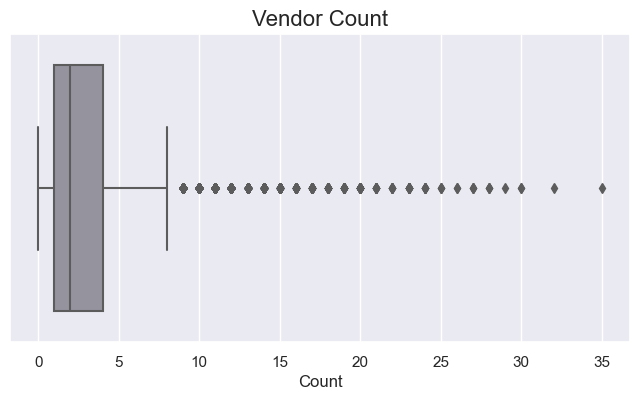

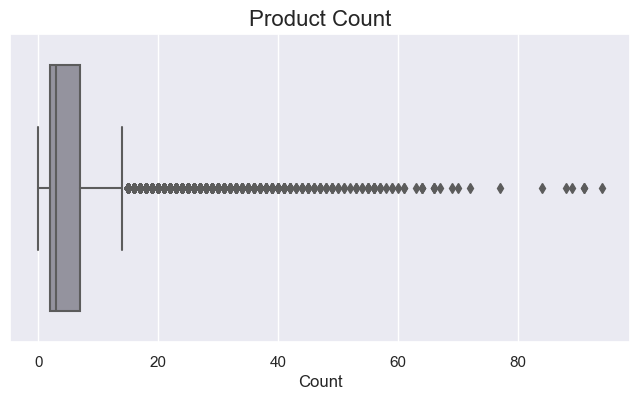

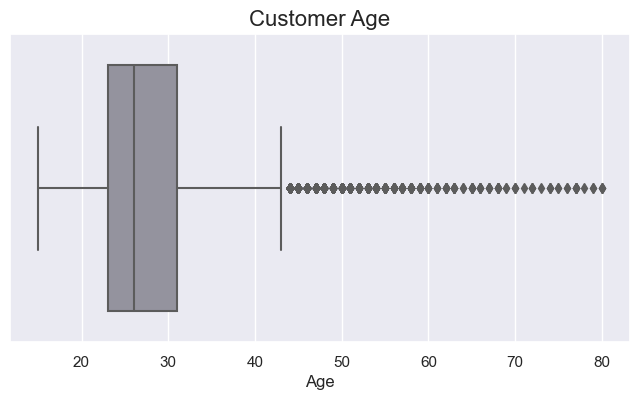

In [ ]:
# Plot vendor_count
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_filtered['vendor_count'], orient='h', color="#9391A0")
plt.title('Vendor Count', fontsize=16)
plt.xlabel('Count', fontsize=12)  
plt.show()  

# Plot product_count
plt.figure(figsize=(8, 4)) 
sns.boxplot(x=df_filtered['product_count'], orient='h', color="#9391A0") 
plt.title('Product Count', fontsize=16) 
plt.xlabel('Count', fontsize=12)  
plt.show()  

# Plot customer_age
plt.figure(figsize=(8, 4))  
sns.boxplot(x=df_filtered['customer_age'], orient='h', color="#9391A0")  
plt.title('Customer Age', fontsize=16) 
plt.xlabel('Age', fontsize=12) 
plt.show()   

We decided to drop the outliers in *vendor_count* and *product_count* manually according to the box plots above.<br>
We decided not to drop the outliers in *customer_age* in order to segment the customer better.

In [ ]:
# Remove the outliers from CUI_ features
filters = (
    (df['CUI_American'] <= 150) &
    (df['CUI_Asian'] <= 300) &
    (df['CUI_Beverages'] <= 125) &
    (df['CUI_Cafe'] <= 125) &
    (df['CUI_Chicken Dishes'] <= 60) &
    (df['CUI_Chinese'] <= 150) &
    (df['CUI_Desserts'] <= 75) &
    (df['CUI_Healthy'] <= 80) &
    (df['CUI_Indian'] <= 110) &
    (df['CUI_Italian'] <= 160) &
    (df['CUI_Japanese'] <= 150) &
    (df['CUI_Noodle Dishes'] <= 75) &
    (df['CUI_OTHER'] <= 125) &
    (df['CUI_Street Food / Snacks'] <= 200) &
    (df['CUI_Thai'] <= 60) &
    (df['vendor_count'] <= 30) &
    (df['product_count'] <= 100)
)

df_filtered = df[filters]

print('Percentage of data kept after removing outliers:', np.round(df_filtered.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.9929


<a class="anchor" id="12">     

# 6. New Feature Creation
</a>

We have decided to create 6 new features as follows:

### 6.1. Regional Demographic
    [city_A; city_B; city_C]

### 6.2. money_spent
    

### 6.3. total_orders


### 6.4. Average purchase 

### 6.5. Age Group

### 6.6. Customer Ordering Level

### 6.7. Customer Preference

### 6.8. days_as_client

<a class="anchor" id="13">     

## 6.1. Regional Demographic: [city a; city b; city c]
</a>

In [37]:
# Define a mapping for the regions with string keys
region_to_city = {
    '2360': 'City A', '2440': 'City A', '2490': 'City A',
    '4660': 'City B', '4140': 'City B',
    '8670': 'City C', '8370': 'City C', '8550': 'City C','8000':'City C'
}

df['Customer_City'] = df['customer_region'].map(region_to_city)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Customer_City
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,City A
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,City C
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,City B


<a class="anchor" id="14">     

## 6.2. money_spent
</a>

In [38]:
# List of all cuisine columns, including the combined CUI_OTHER
cuisine_columns = [col for col in df.columns if 'CUI_' in col]  

# Creat new feature 'money_spent' as the sum zCalculate total orders by summing across all cuisine columns and c
df['money_spent'] = df[cuisine_columns].sum(axis=1)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Customer_City,money_spent
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,City A,28.88
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,City C,19.21
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,City B,9.20


<a class="anchor" id="15">     

## 6.3. total_orders
</a>

In [39]:
# List of columns to sum
columns_to_sum = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Create new feature 'total_order' as the sum of the specified columns
df['total_orders'] = df[columns_to_sum].sum(axis=1)

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Customer_City,money_spent,total_orders
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,City A,28.88,2
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,City C,19.21,2
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,City B,9.20,2


<a class="anchor" id="16">     

## 6.4. average_purchase
</a>

In [40]:
df['average_purchase'] = df['money_spent'] / df['total_orders']

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Customer_City,money_spent,total_orders,average_purchase
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,City A,28.88,2,14.440
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,City C,19.21,2,9.605
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,City B,9.20,2,4.600


In [41]:
df['total_orders'].unique()

array([ 2,  3,  4,  5,  7,  6, 12, 16, 23, 10,  8, 21, 14, 11, 15, 13,  9,
       20, 26, 17, 25, 54, 30, 18, 42, 19, 32, 36, 22, 28, 34, 24, 33, 46,
       39, 27, 47, 37, 58, 41, 38, 63, 31, 69, 44, 35, 52, 57, 82, 90, 94,
       62, 43, 61, 70, 60, 55, 40,  1,  0, 29, 51, 53, 65, 45, 91, 50, 75,
       49, 48, 80, 59])

<a class="anchor" id="17">     

## 6.5. age_group
</a>

In [42]:
# Define age categories
bins = [0, 18, 35, 60, float('inf')]  # Age ranges
labels = ['Child', 'Young Adult', 'Adult', 'Senior']

# Create new feature 'age_group'
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)
df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Customer_City,money_spent,total_orders,average_purchase,age_group
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,City A,28.88,2,14.440,Young Adult
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,City C,19.21,2,9.605,Child
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,City B,9.20,2,4.600,Adult


In [43]:
# Define periods of the day
morning_columns = ['HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11']
afternoon_columns = ['HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17']
evening_columns = ['HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']
night_columns = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5']

# Create new features by summing the orders in each period
df['morning_orders'] = df[morning_columns].sum(axis=1)
df['afternoon_orders'] = df[afternoon_columns].sum(axis=1)
df['evening_orders'] = df[evening_columns].sum(axis=1)
df['night_orders'] = df[night_columns].sum(axis=1)
df.head(12)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Customer_City,money_spent,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,City A,28.88,2,14.440000,Young Adult,0,0,2,0
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,City C,19.21,2,9.605000,Child,2,0,0,0
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,City B,9.20,2,4.600000,Adult,2,0,0,0
3,180c632ed8,4660,26,2,3,1,0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.00,0.0,0.00,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,City B,31.56,2,15.780000,Young Adult,1,1,0,0
4,4eb37a6705,4660,20,2,5,0,0,2,UNKNOWN,DIGI,14.57,40.87,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,City B,55.44,2,27.720000,Young Adult,2,0,0,0
5,6aef2b6726,8670,40,2,2,0,0,2,FREEBIE,DIGI,0.00,24.92,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,City C,24.92,2,12.460000,Adult,0,0,0,2
6,8475ee66ef,2440,24,2,2,1,0,2,UNKNOWN,CARD,5.88,0.00,1.53,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,City A,7.41,2,3.705000,Young Adult,1,1,0,0
7,f2f53bcc67,8670,27,2,3,1,0,2,DISCOUNT,DIGI,11.71,0.00,24.40,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,City C,36.11,2,18.055000,Young Adult,1,1,0,0
8,5b650c89cc,2360,20,3,4,1,0,3,DISCOUNT,DIGI,2.75,0.00,0.00,0.0,0.0,0.00,0.0,4.39,0.00,0.0,0.0,0.0,7.3,0.0,0.0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,City A,14.44,3,4.813333,Young Adult,0,1,2,0
9,84775a7237,8670,20,2,3,0,0,3,DELIVERY,CARD,0.00,32.48,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,City C,32.48,2,16.240000,Young Adult,0,0,0,2


<a class="anchor" id="18">     

## 6.6. customer_type
</a>

=<2 -> Infrequent
2< orders <=5 -> Moderate
<5 -> Frequent

In [44]:
# Calculate the percentiles
q1 = df['total_orders'].quantile(0.25)
q3 = df['total_orders'].quantile(0.75)

# Define thresholds based on percentiles
df['customer_type'] = pd.cut(df['total_orders'], 
                             bins=[-float('inf'), q1, q3, float('inf')], 
                             labels=['Infrequent', 'Moderate', 'Frequent'])
df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Customer_City,money_spent,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_type
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,City A,28.88,2,14.440,Young Adult,0,0,2,0,Infrequent
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,City C,19.21,2,9.605,Child,2,0,0,0,Infrequent
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,City B,9.20,2,4.600,Adult,2,0,0,0,Infrequent


In [45]:
df.shape

(31875, 66)

In [46]:
df['customer_type'].value_counts()

customer_type
Infrequent    14260
Moderate      10477
Frequent       7138
Name: count, dtype: int64

In [47]:
Infrequent_counts = df[df['customer_type'] == 'Infrequent']['total_orders'].value_counts()
print(Infrequent_counts)

total_orders
2    7214
1    6908
0     138
Name: count, dtype: int64


In [48]:
clients_with_zero_orders = df[df['total_orders'] == 0]

We decided to drop customers who have not ordered in 90 days.

In [49]:
df.drop(df[df['total_orders'] == 0].index, inplace=True)

In [50]:
df.shape

(31737, 66)

In [51]:
Moderate_counts = df[df['customer_type'] == 'Moderate']['total_orders'].value_counts()
print(Moderate_counts)

total_orders
3    5097
4    3168
5    2212
Name: count, dtype: int64


In [52]:
frequent_counts = df[df['customer_type'] == 'Frequent']['total_orders'].value_counts()

In [53]:
print(f"25th Percentile (Q1): {q1}")
print(f"75th Percentile (Q3): {q3}")

25th Percentile (Q1): 2.0
75th Percentile (Q3): 5.0


<a class="anchor" id="18">     

## 6.7. customer_reference
</a>


In [54]:
# Identify the column with the labeled value for each customer
# Define all cuisine columns explicitly
cuisine_columns = [
    "CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes",
    "CUI_Chinese", "CUI_Desserts", "CUI_Healthy", "CUI_Indian", "CUI_Italian",
    "CUI_Japanese", "CUI_Noodle Dishes", "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"
]

# Apply idxmax only to the cuisine columns
df['customer_reference'] = df[cuisine_columns].apply(lambda row: row.idxmax(), axis=1)
df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Customer_City,money_spent,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_type,customer_reference
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,City A,28.88,2,14.440,Young Adult,0,0,2,0,Infrequent,CUI_Indian
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,City C,19.21,2,9.605,Child,2,0,0,0,Infrequent,CUI_American
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,City B,9.20,2,4.600,Adult,2,0,0,0,Infrequent,CUI_American


<a class="anchor" id="19">     

## 6.8. days_as_client
</a>


In [55]:
df['days_as_client'] = df['last_order'] - df['first_order']

df.head(3)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Customer_City,money_spent,total_orders,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_type,customer_reference,days_as_client
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,City A,28.88,2,14.440,Young Adult,0,0,2,0,Infrequent,CUI_Indian,1
1,5d272b9dcb,8670,17,2,2,1,0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,City C,19.21,2,9.605,Child,2,0,0,0,Infrequent,CUI_American,1
2,f6d1b2ba63,4660,38,1,2,1,0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,City B,9.20,2,4.600,Adult,2,0,0,0,Infrequent,CUI_American,1


<a class="anchor" id="19">     

# 7. Data Pre-Processing 2
</a>    

## Drop Features

- 'last_promo': 16748 (-) --> Exaggerated number of missing values
- 'customer_region'

- 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6' --> Total orders

- 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11' --> morning_columns
- 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17'--> afternoon_columns
- 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23' --> evening_columns
- 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5' --> night_columns

- 'last_order', 'first_order' --> days_as_client

- 'total_orders' -> 'customer_type'
- customer_age --> age_group

- "CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe", "CUI_Chicken Dishes",
    "CUI_Chinese", "CUI_Desserts", "CUI_Healthy", "CUI_Indian", "CUI_Italian",
    "CUI_Japanese", "CUI_Noodle Dishes", "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai" --> 'Customer Preference'

In [ ]:
df.drop('customer_region', axis=1, inplace=True)
df.drop('DOW_0', axis=1, inplace=True)
df.drop('DOW_1', axis=1, inplace=True)
df.drop('DOW_2', axis=1, inplace=True)
df.drop('DOW_3', axis=1, inplace=True)
df.drop('DOW_4', axis=1, inplace=True)
df.drop('DOW_5', axis=1, inplace=True)
df.drop('DOW_6', axis=1, inplace=True)
df.drop('HR_0', axis=1, inplace=True)
df.drop('HR_1', axis=1, inplace=True)
df.drop('HR_2', axis=1, inplace=True)
df.drop('HR_3', axis=1, inplace=True)
df.drop('HR_4', axis=1, inplace=True)
df.drop('HR_5', axis=1, inplace=True)
df.drop('HR_6', axis=1, inplace=True)
df.drop('HR_7', axis=1, inplace=True)
df.drop('HR_8', axis=1, inplace=True)
df.drop('HR_9', axis=1, inplace=True)
df.drop('HR_10', axis=1, inplace=True)
df.drop('HR_11', axis=1, inplace=True)
df.drop('HR_12', axis=1, inplace=True)
df.drop('HR_13', axis=1, inplace=True)
df.drop('HR_14', axis=1, inplace=True)
df.drop('HR_15', axis=1, inplace=True)
df.drop('HR_16', axis=1, inplace=True)
df.drop('HR_17', axis=1, inplace=True)
df.drop('HR_18', axis=1, inplace=True)
df.drop('HR_19', axis=1, inplace=True)
df.drop('HR_20', axis=1, inplace=True)
df.drop('HR_21', axis=1, inplace=True)
df.drop('HR_22', axis=1, inplace=True)
df.drop('HR_23', axis=1, inplace=True)
df.drop('first_order', axis=1, inplace=True)
df.drop('last_order', axis=1, inplace=True)
df.drop('total_orders', axis=1, inplace=True)
df.drop('customer_age', axis=1, inplace=True)
df.drop('CUI_American', axis=1, inplace=True)
df.drop('CUI_Asian', axis=1, inplace=True)
df.drop('CUI_Beverages', axis=1, inplace=True)
df.drop('CUI_Cafe', axis=1, inplace=True)
df.drop('CUI_Chicken Dishes', axis=1, inplace=True)
df.drop('CUI_Chinese', axis=1, inplace=True)
df.drop('CUI_Desserts', axis=1, inplace=True)
df.drop('CUI_Healthy', axis=1, inplace=True)
df.drop('CUI_Indian', axis=1, inplace=True)
df.drop('CUI_Italian', axis=1, inplace=True)
df.drop('CUI_Japanese', axis=1, inplace=True)
df.drop('CUI_Noodle Dishes', axis=1, inplace=True)
df.drop('CUI_OTHER', axis=1, inplace=True)
df.drop('CUI_Street Food / Snacks', axis=1, inplace=True)
df.drop('CUI_Thai', axis=1, inplace=True)

In [58]:
df.drop('last_promo', axis=1, inplace=True)

In [59]:
df.head(3)

,customer_id,vendor_count,product_count,is_chain,payment_method,Customer_City,money_spent,average_purchase,age_group,morning_orders,afternoon_orders,evening_orders,night_orders,customer_type,customer_reference,days_as_client
0,1b8f824d5e,2,5,1,DIGI,City A,28.88,14.440,Young Adult,0,0,2,0,Infrequent,CUI_Indian,1
1,5d272b9dcb,2,2,1,DIGI,City C,19.21,9.605,Child,2,0,0,0,Infrequent,CUI_American,1
2,f6d1b2ba63,1,2,1,CASH,City B,9.20,4.600,Adult,2,0,0,0,Infrequent,CUI_American,1


<a class="anchor" id="20">     

# 8. Feature Selection
</a>    

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


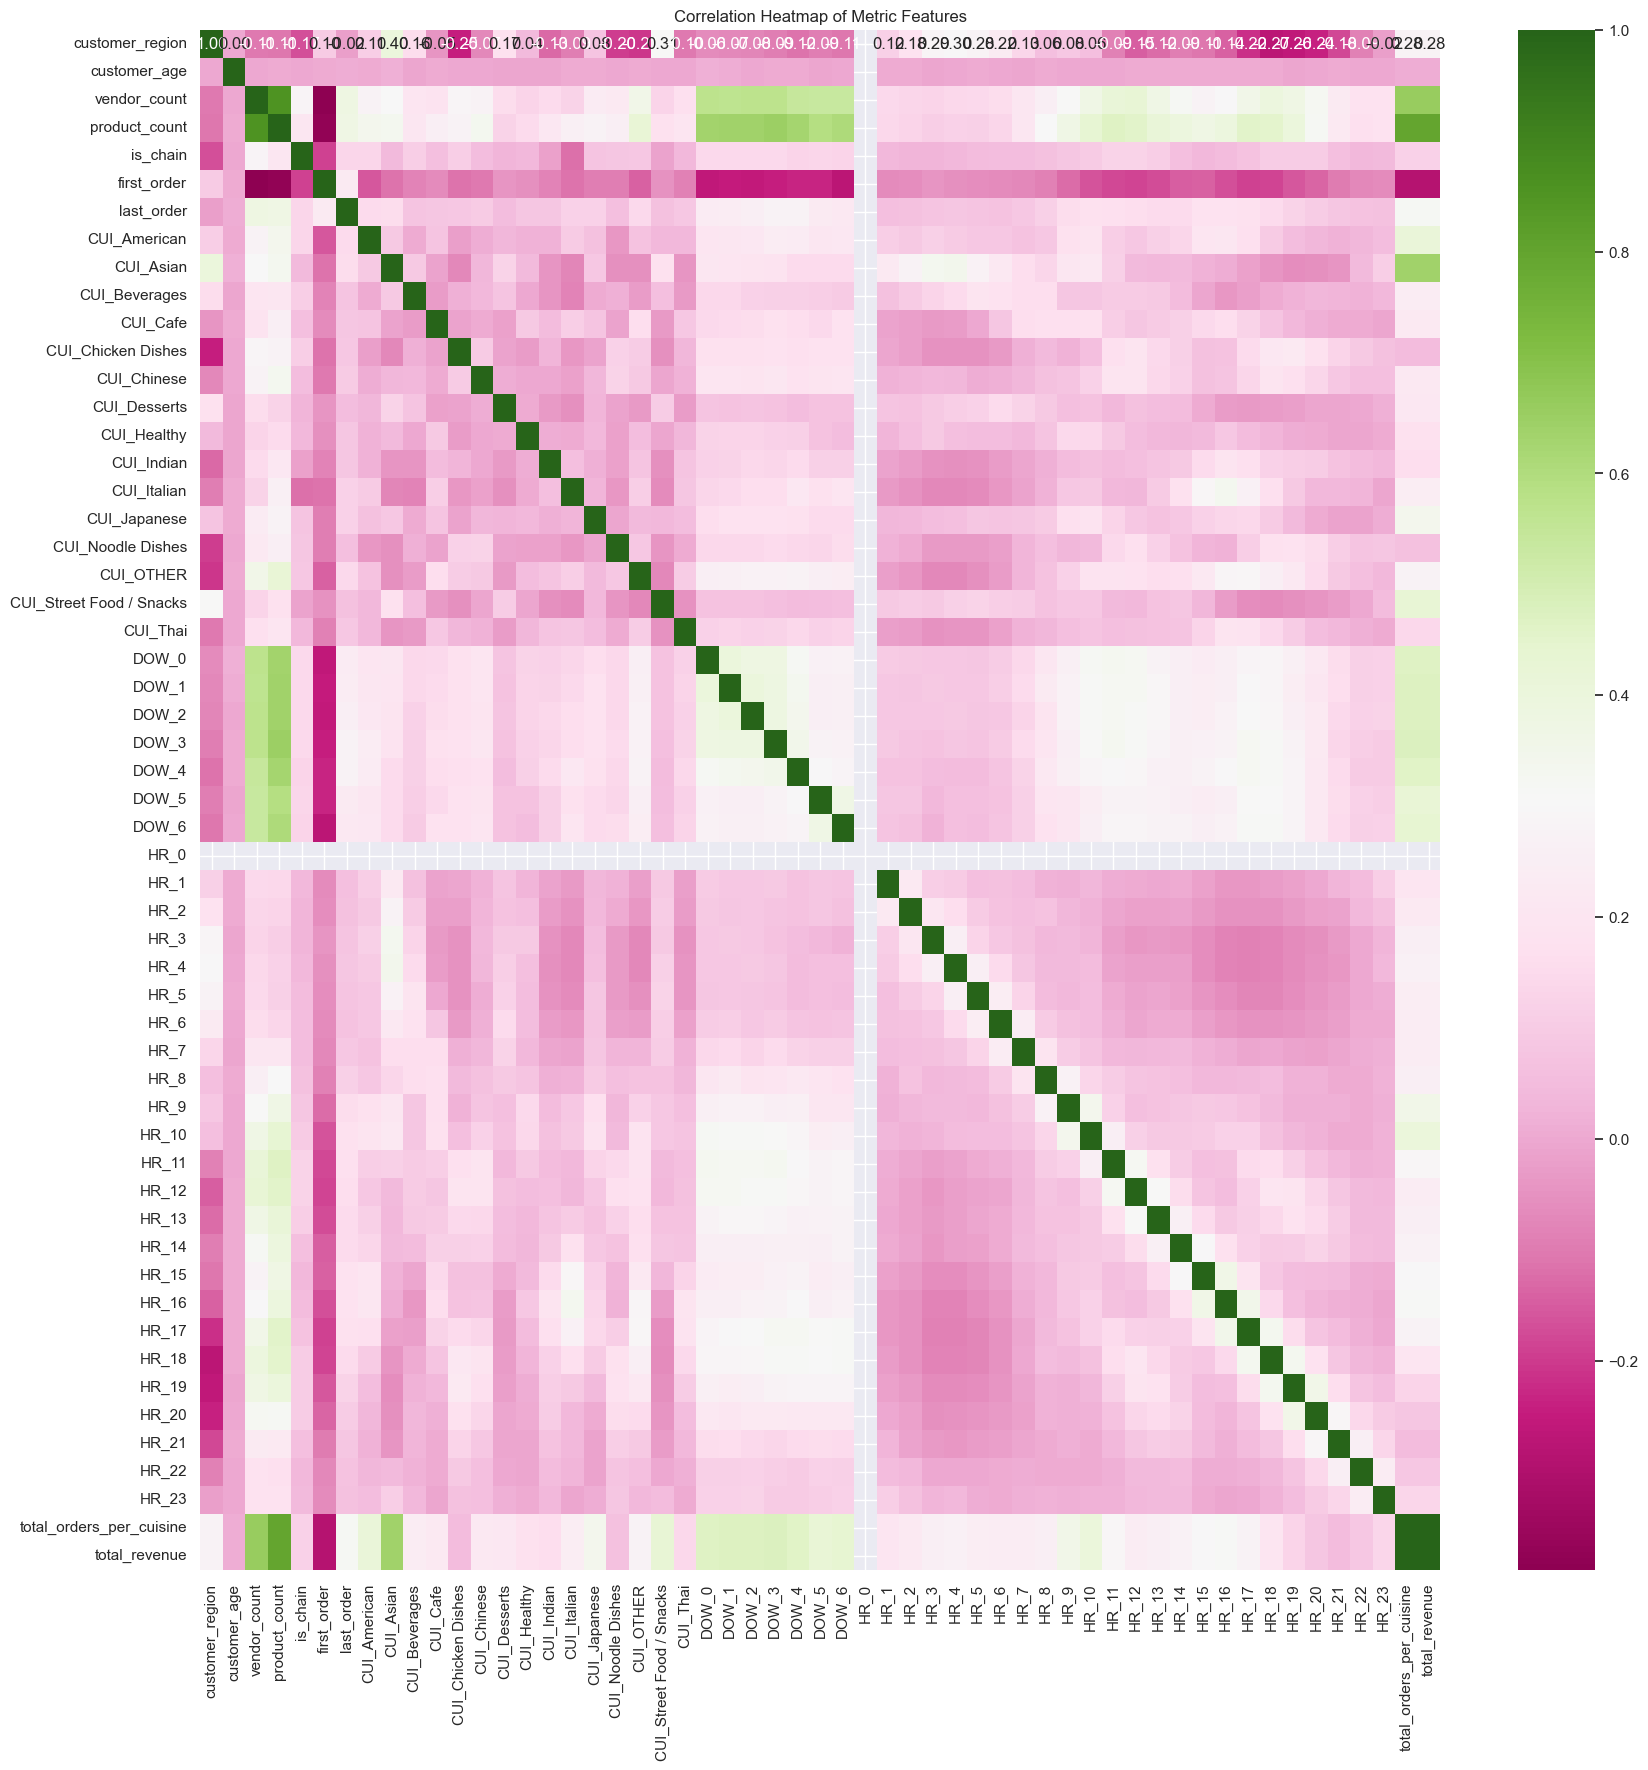

In [ ]:
# Turn metric features into df to make a heatmap
metric_features_df = df_filtered[metric_features]

correlation_matrix = metric_features_df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="PiYG", fmt=".2f")
plt.title("Correlation Heatmap of Metric Features")
plt.show()

In [ ]:
#See features with less than 0.01 variance
metric_features_df.var()[metric_features_df.var() < 0.01]

HR_0    0.0
dtype: float64

High correlated features:
- product_count & vendor_count (0.9)
- product_count & total_orders_per_cuisine (0.8)
- product_count & total_revenue (0.8)
- product_count & money_spent (0.8)
- first_order & days_as_client (-0.8)
- total_orders_per_cuisine & total_revenue (1)
- total_orders_per_cuisine & money_spent (1)
- total_revenue & money_spent (1)
- city_a & customer_region (-1)
- city_c & customer_region (0.8)

## Remove features from metric_features: *product_count* and *customer_region*

In [ ]:
# Notebook says "you can also drop the features from the df"
# But sometimes they may be useful for cluster profiling later

## RUN THIS CELL ONLY ONCE!!!!
metric_features.remove("product_count")
metric_features.remove("customer_region")

metric_features

['customer_age',
 'vendor_count',
 'is_chain',
 'first_order',
 'last_order',
 'CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai',
 'DOW_0',
 'DOW_1',
 'DOW_2',
 'DOW_3',
 'DOW_4',
 'DOW_5',
 'DOW_6',
 'HR_0',
 'HR_1',
 'HR_2',
 'HR_3',
 'HR_4',
 'HR_5',
 'HR_6',
 'HR_7',
 'HR_8',
 'HR_9',
 'HR_10',
 'HR_11',
 'HR_12',
 'HR_13',
 'HR_14',
 'HR_15',
 'HR_16',
 'HR_17',
 'HR_18',
 'HR_19',
 'HR_20',
 'HR_21',
 'HR_22',
 'HR_23',
 'total_orders_per_cuisine',
 'total_revenue']

## Redo data exploration

### Re-check Missing Values

In [ ]:
# Turn non metric features into df 
non_metric_features_df = df[non_metric_features]

In [ ]:
non_metric_features_df.isna().sum()

customer_id       0
last_promo        0
payment_method    0
dtype: int64

In [ ]:
metric_features_df.isna().sum()

customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1                        0
HR_2                        0
HR_3                        0
HR_4      

### Re-check outliers

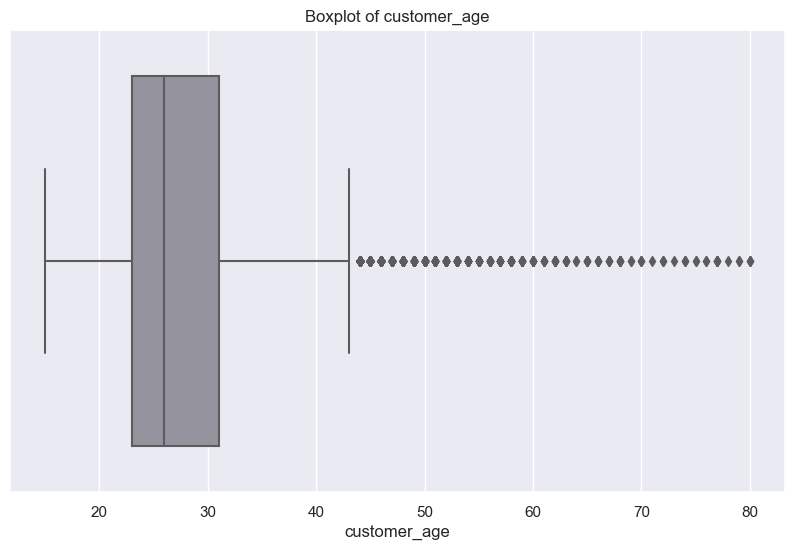

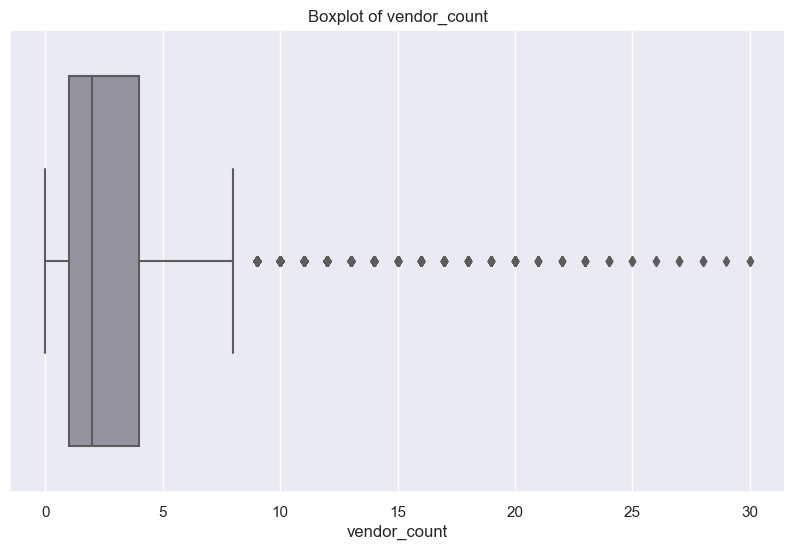

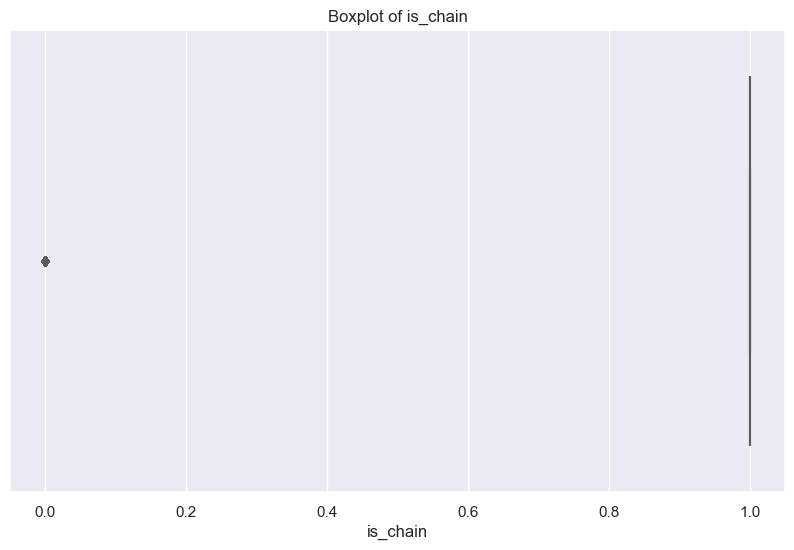

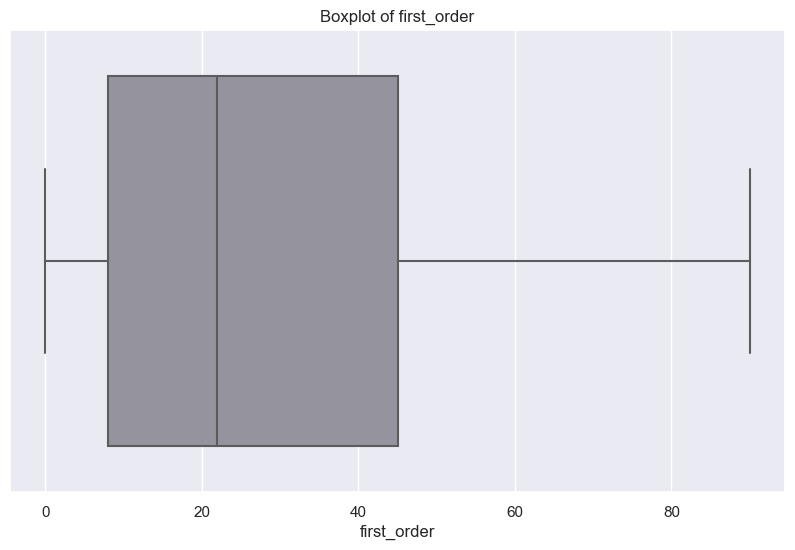

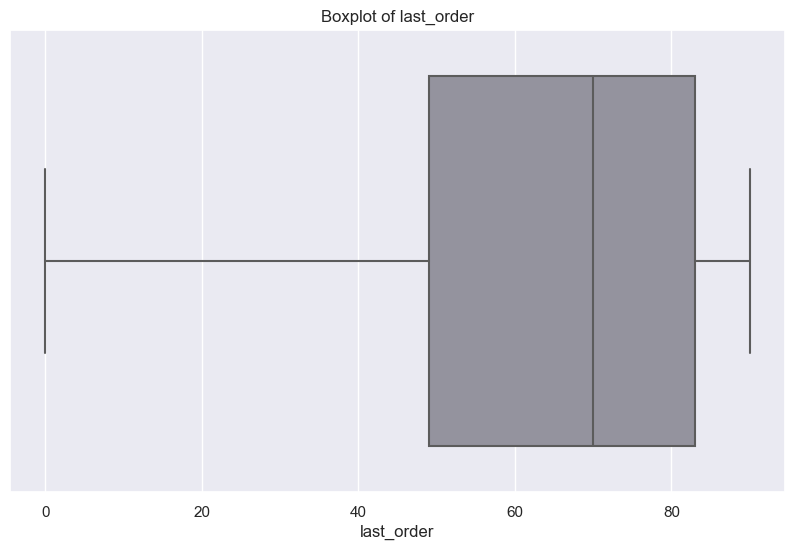

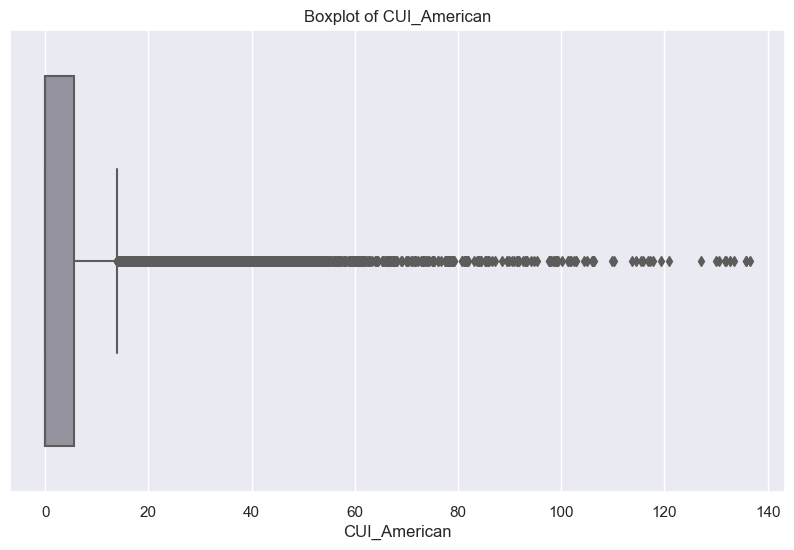

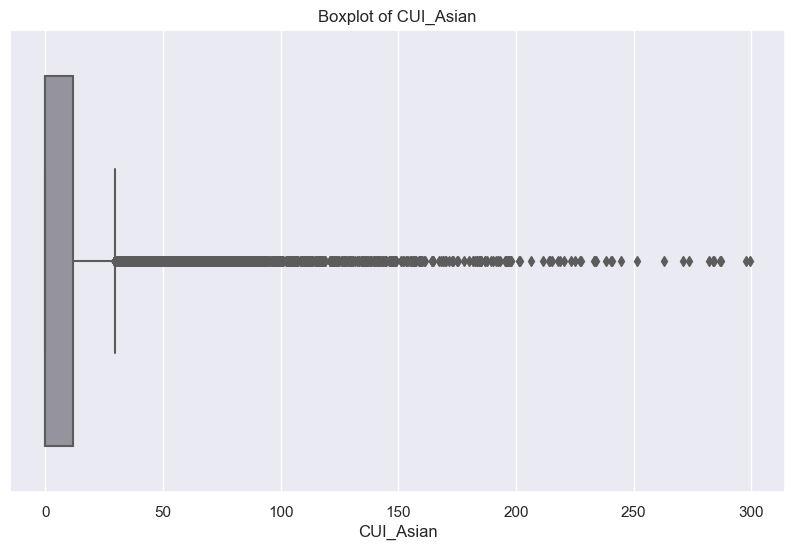

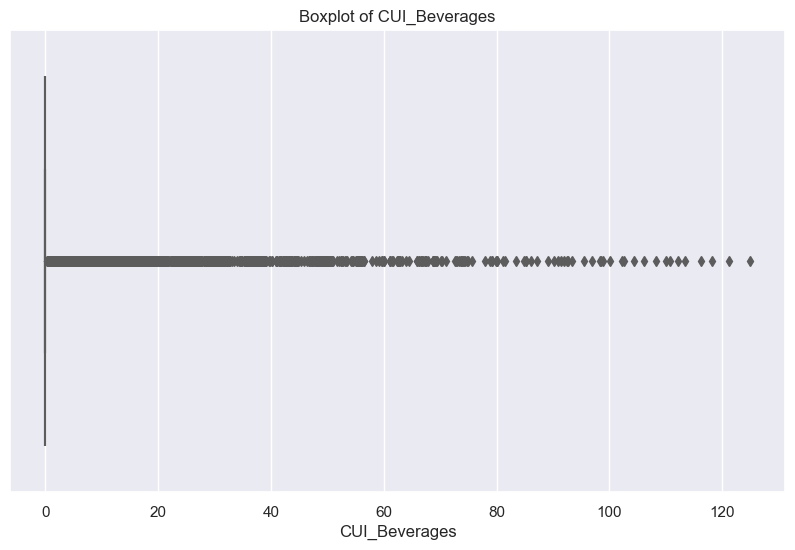

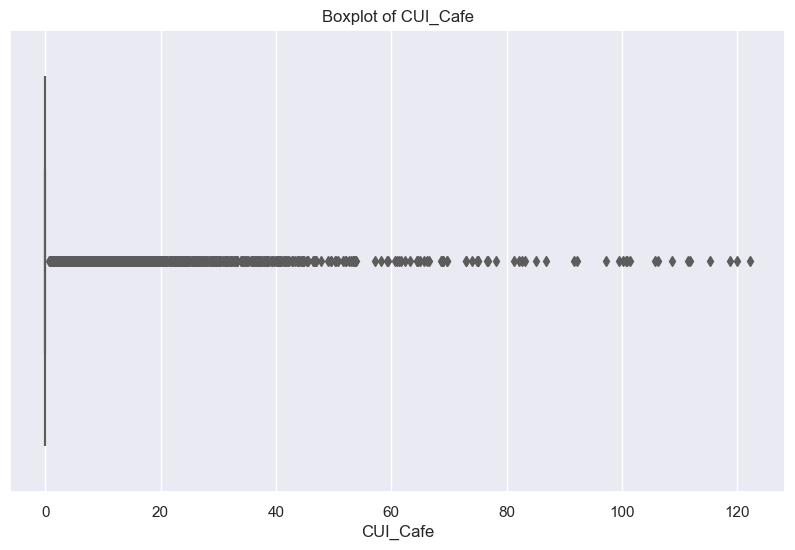

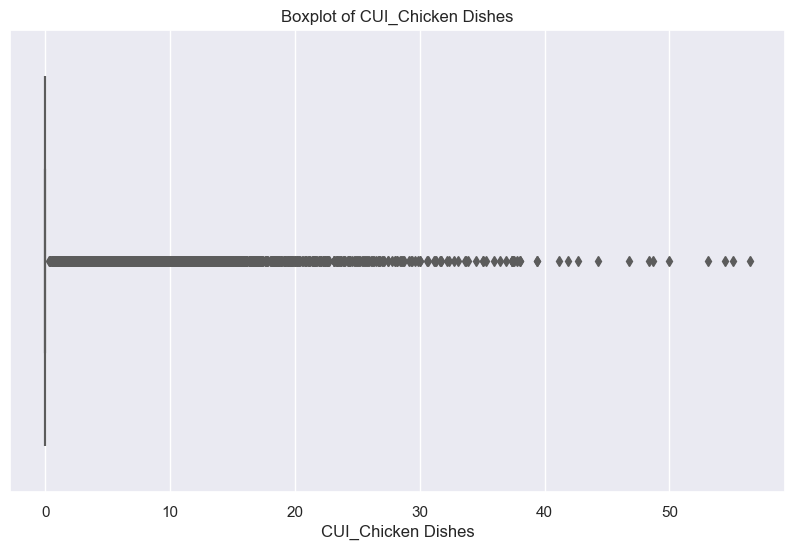

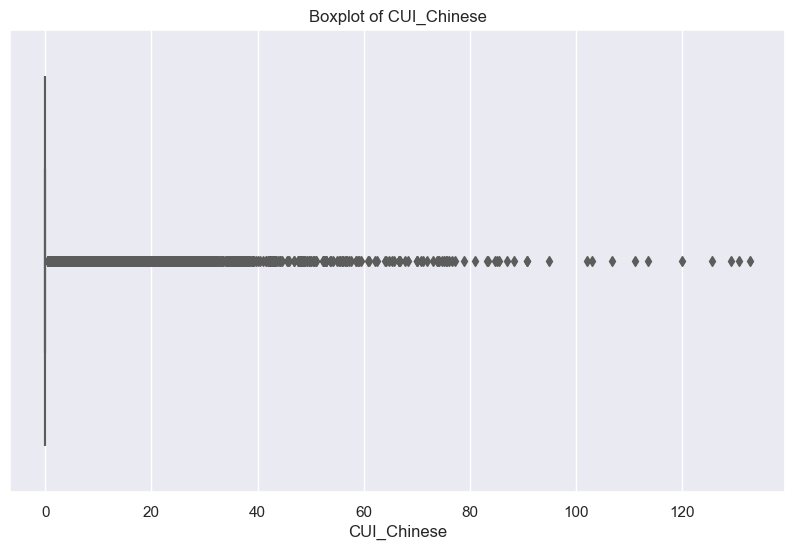

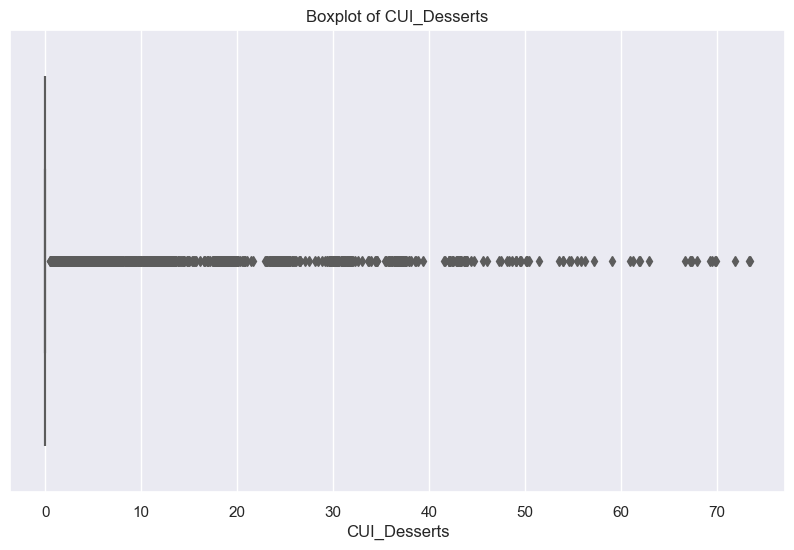

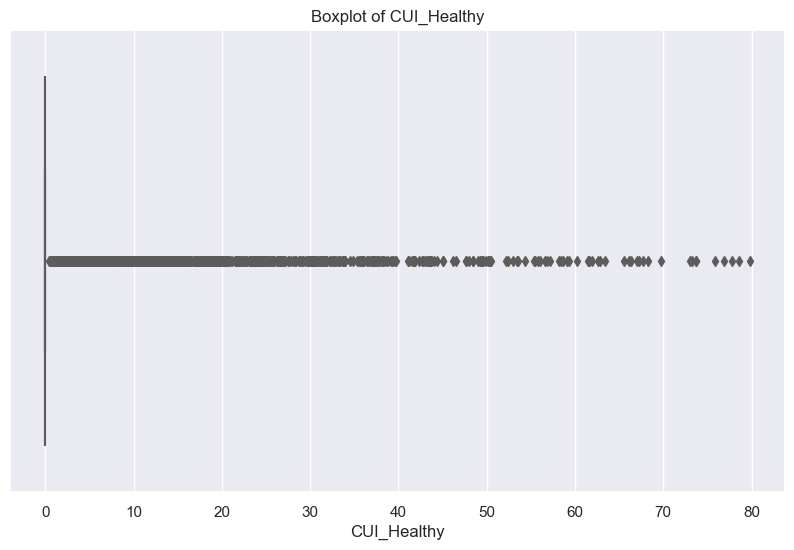

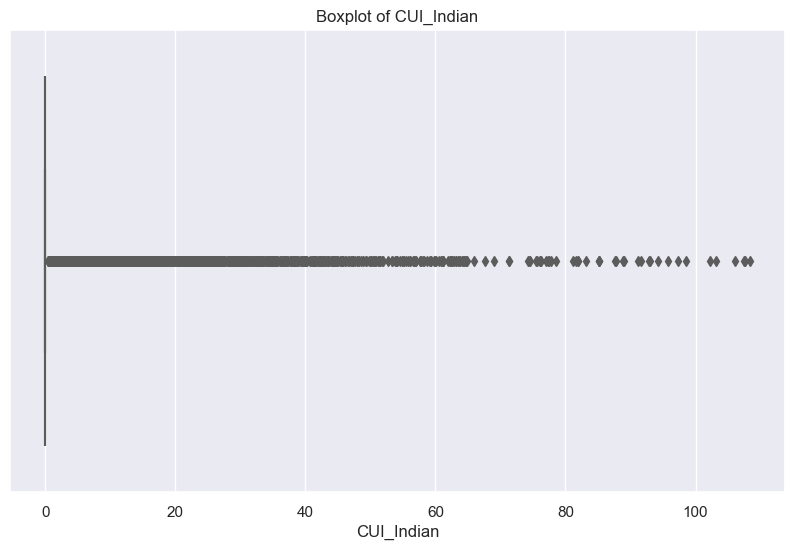

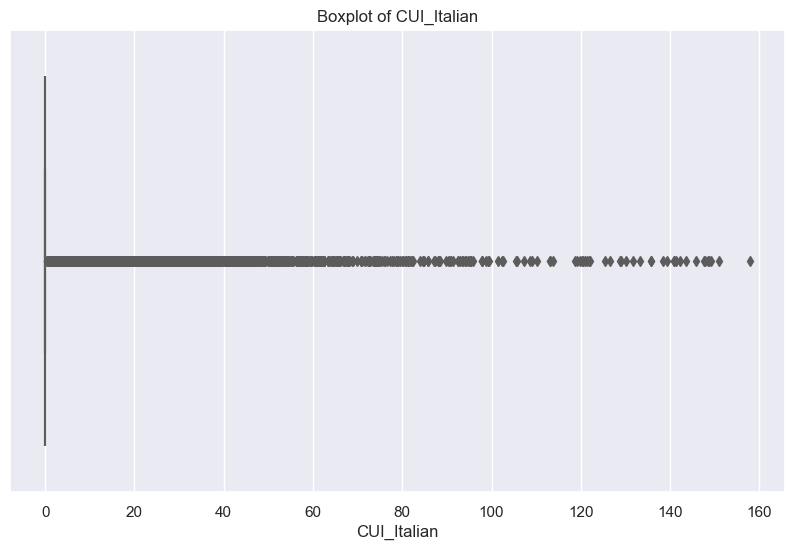

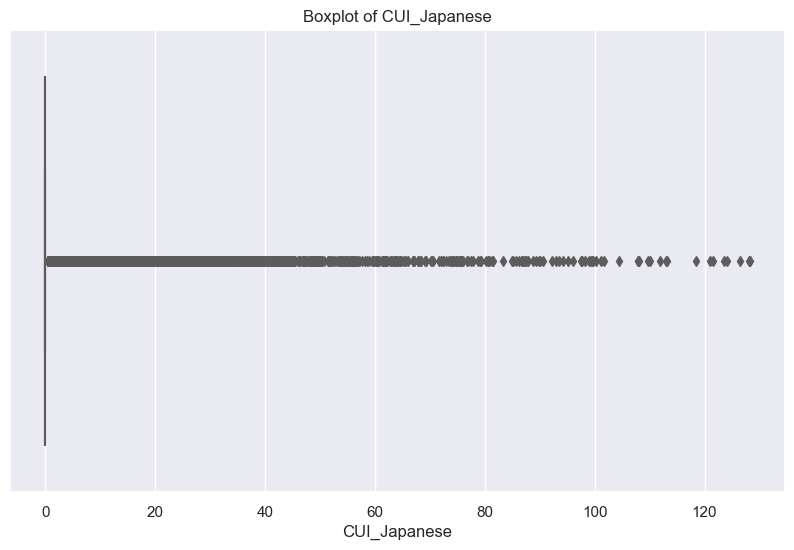

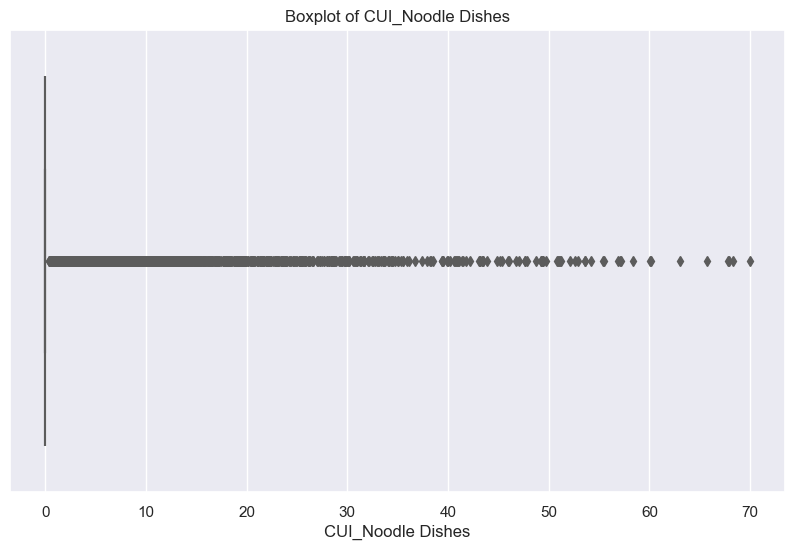

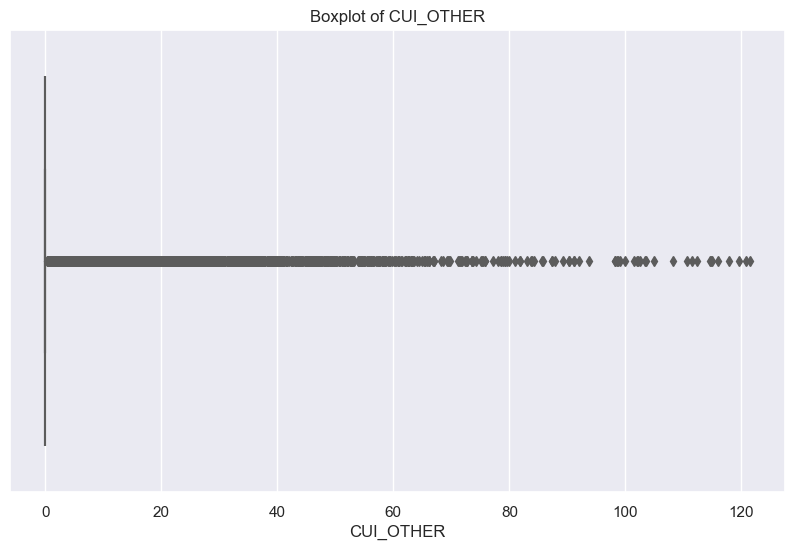

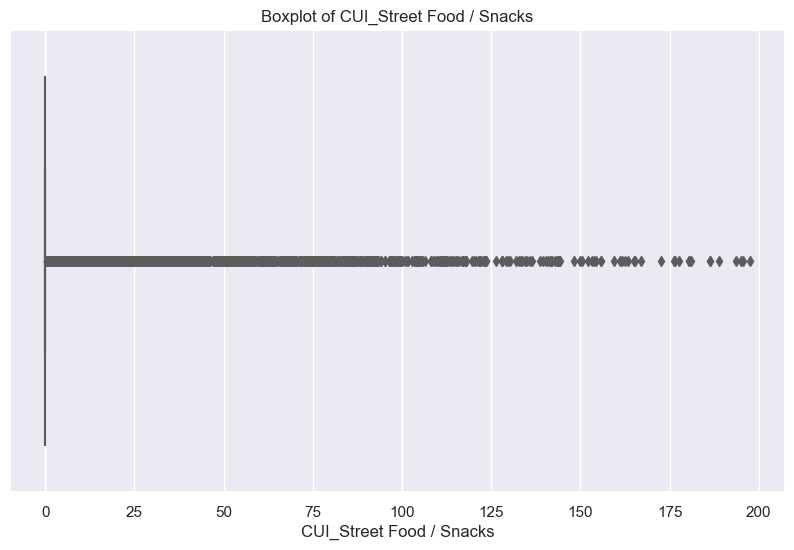

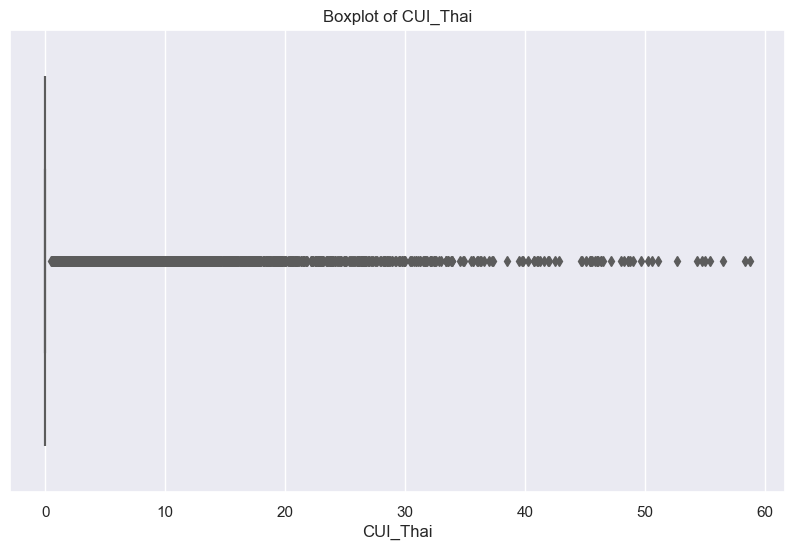

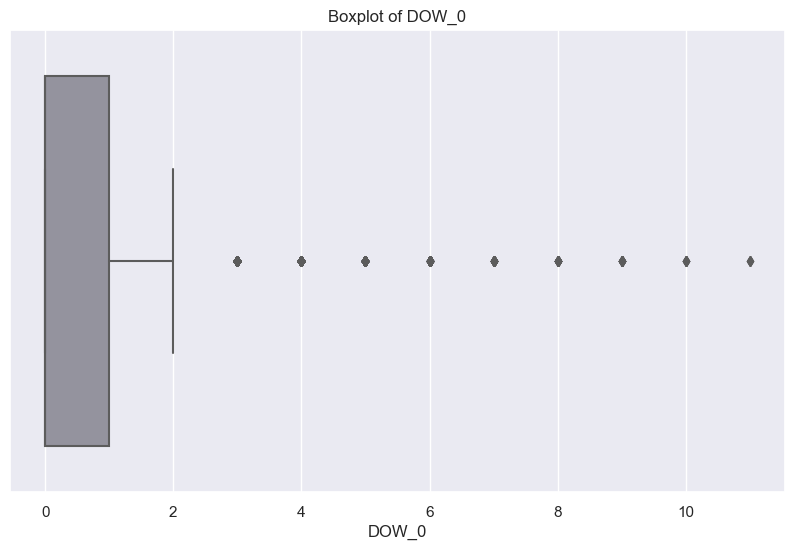

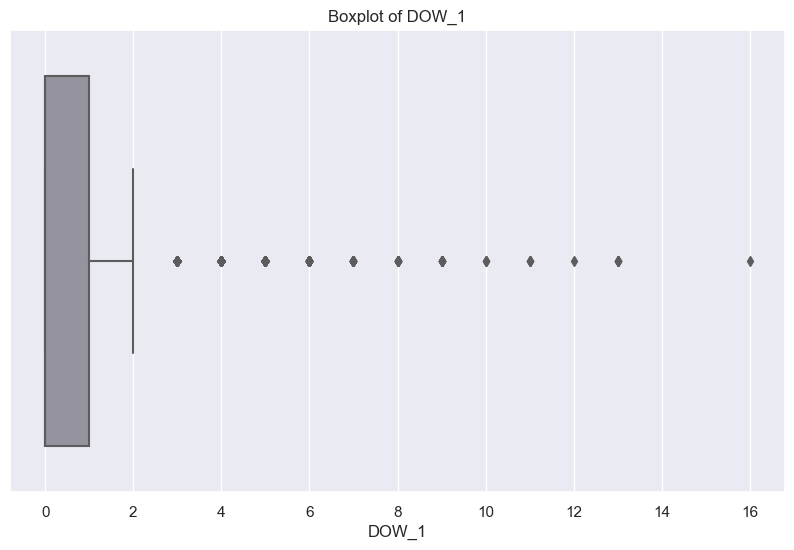

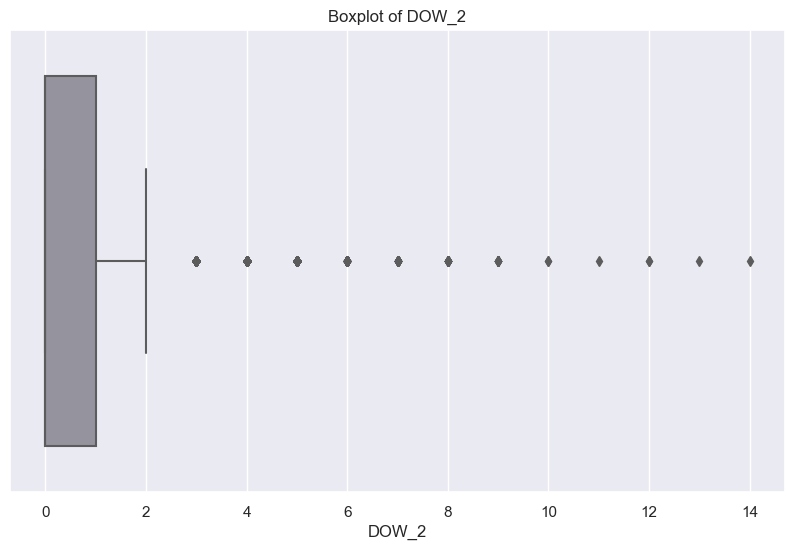

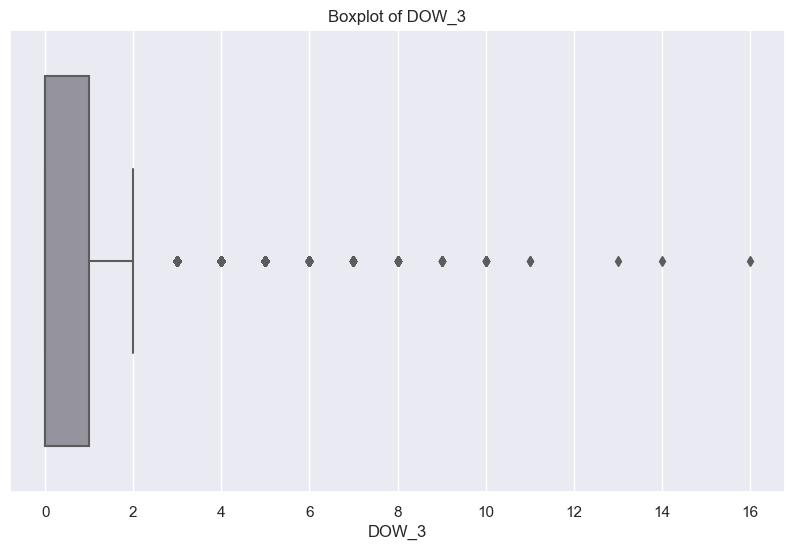

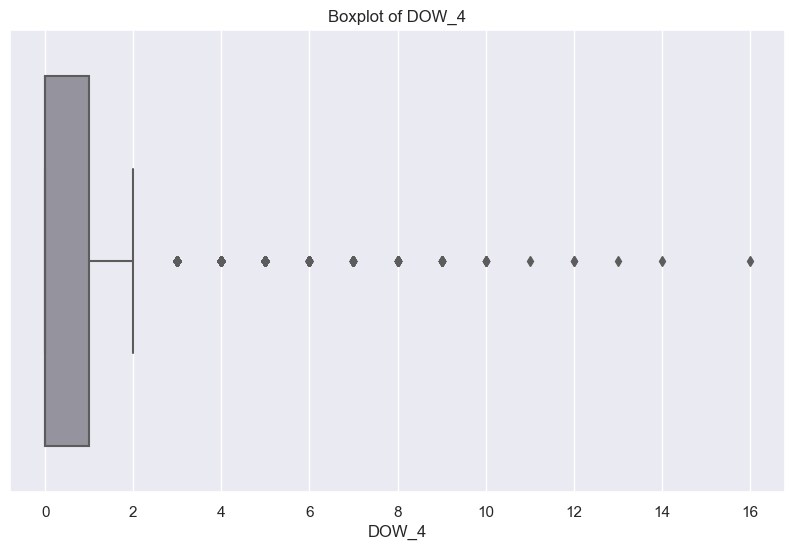

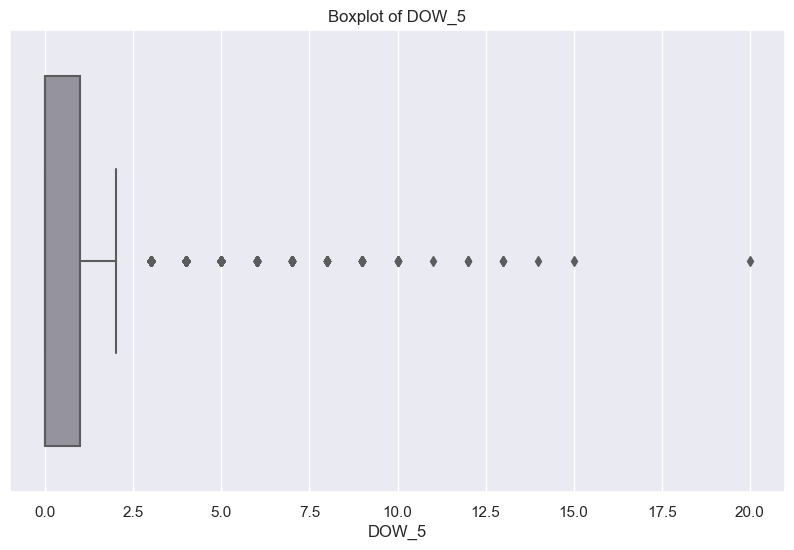

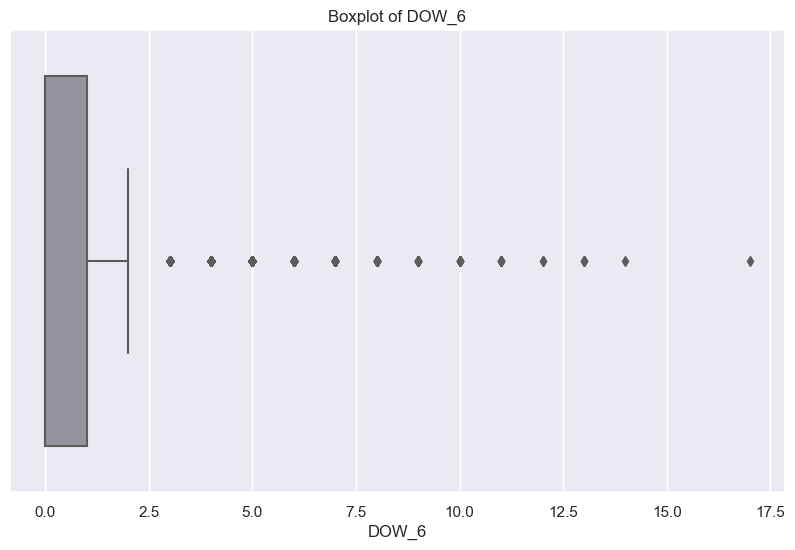

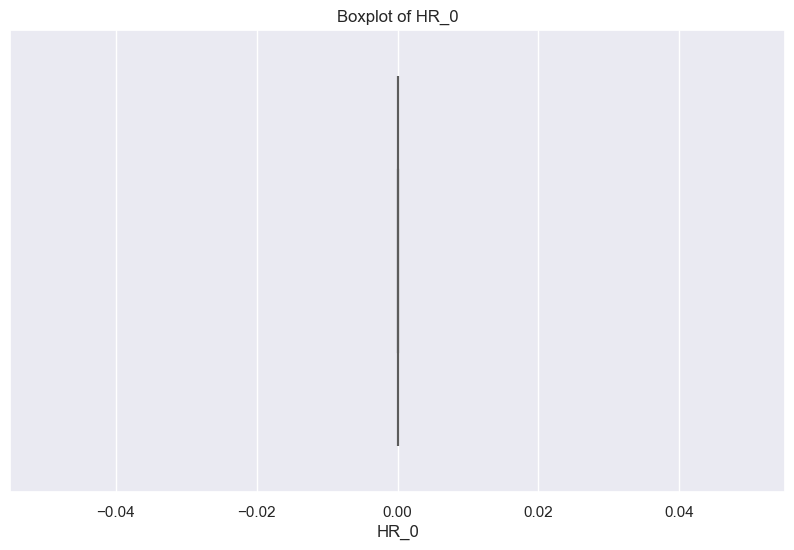

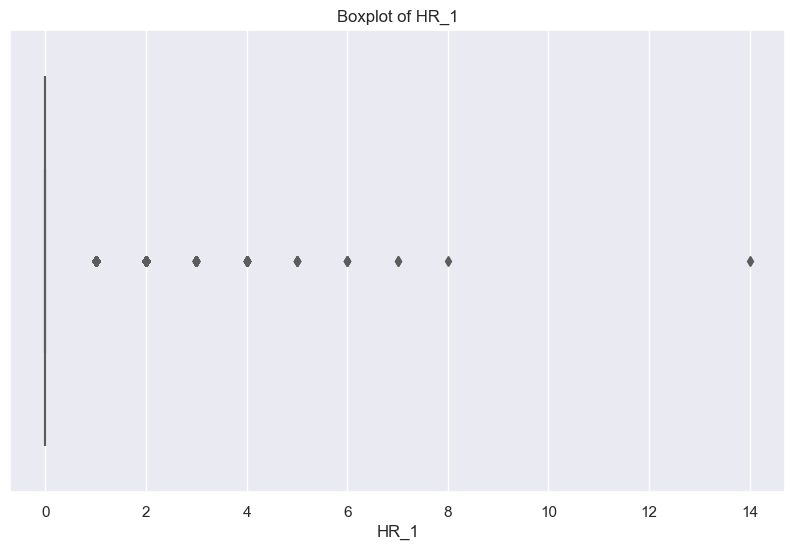

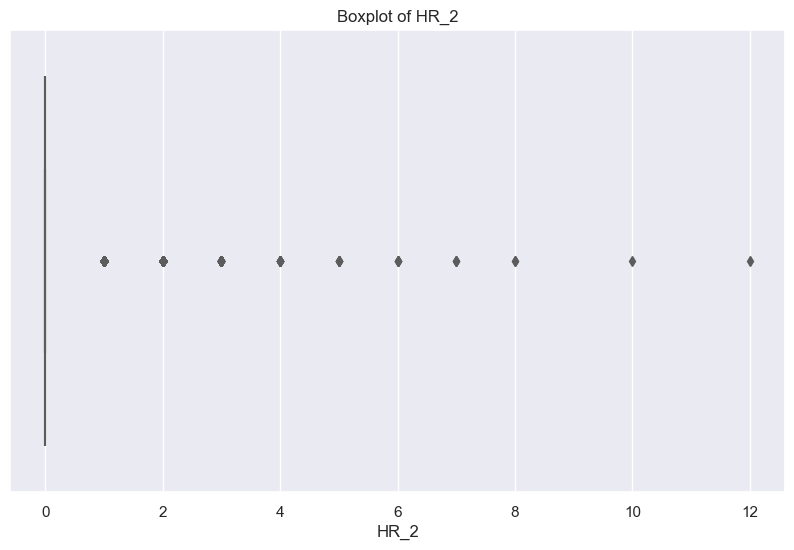

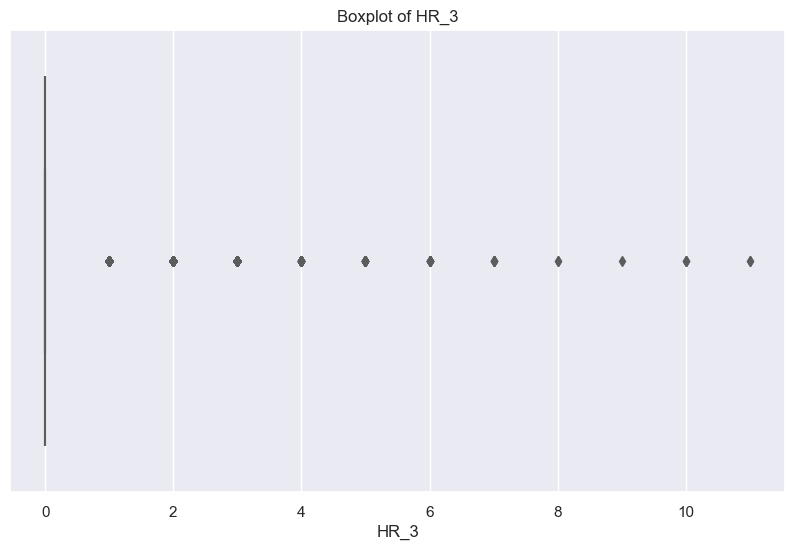

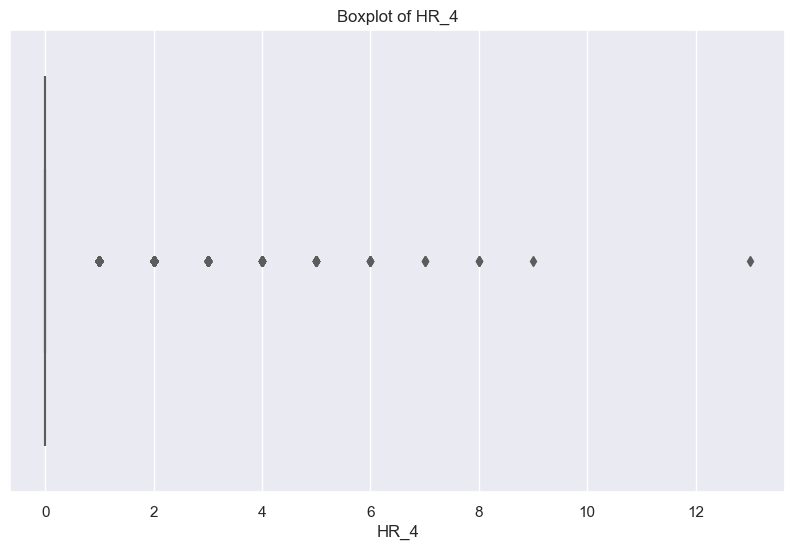

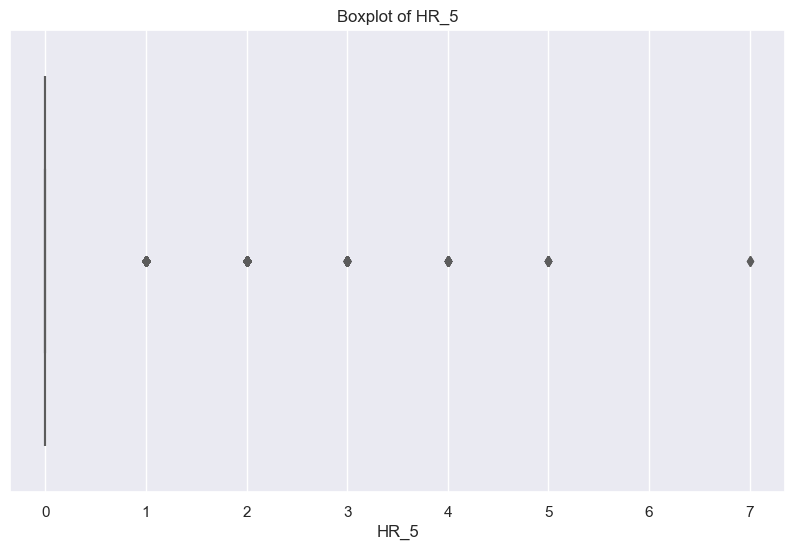

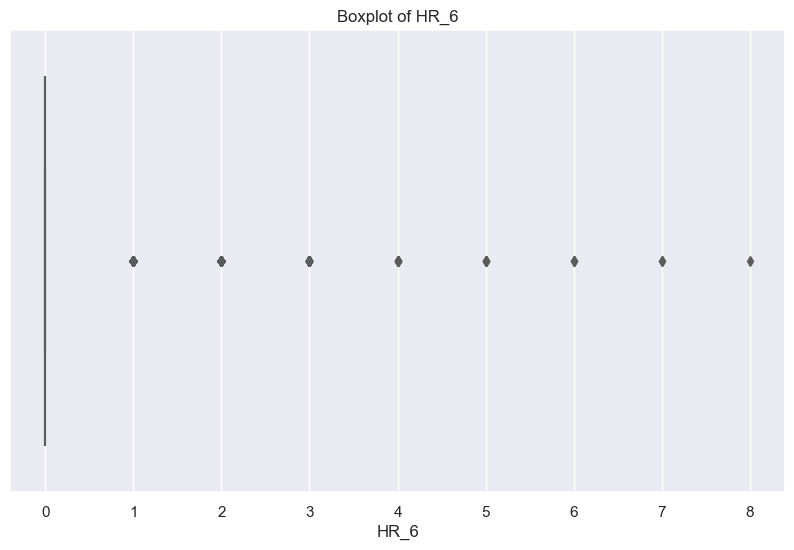

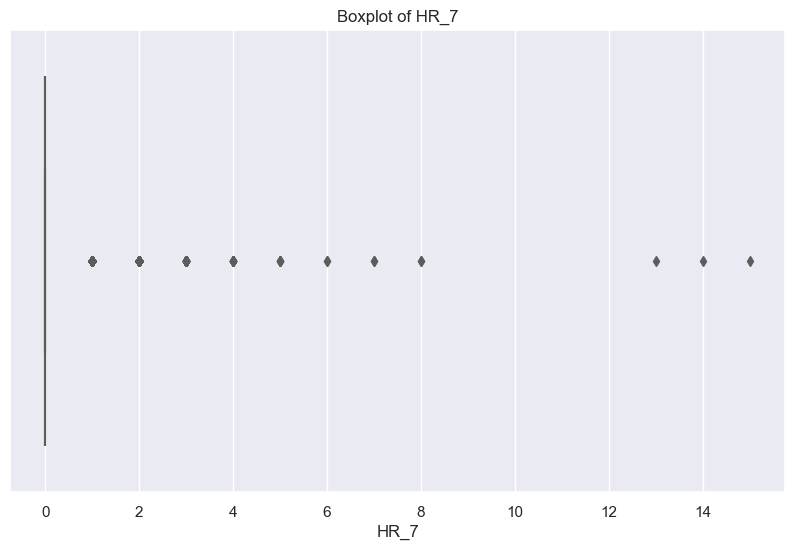

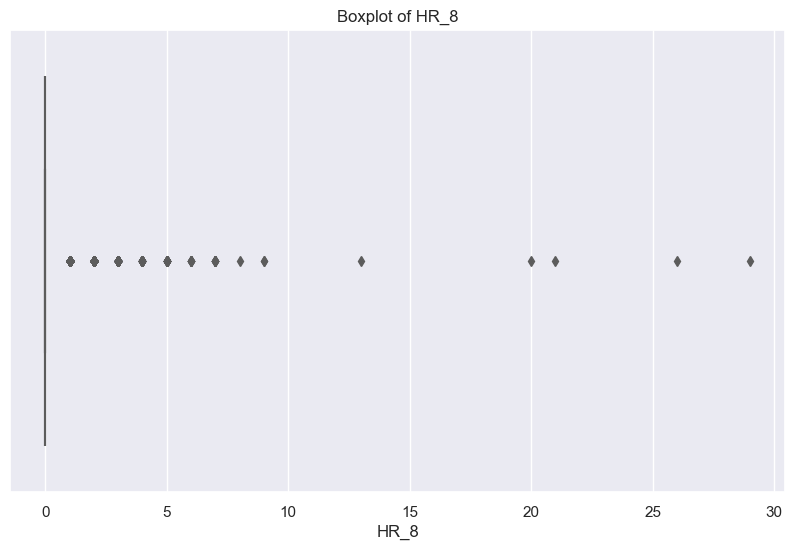

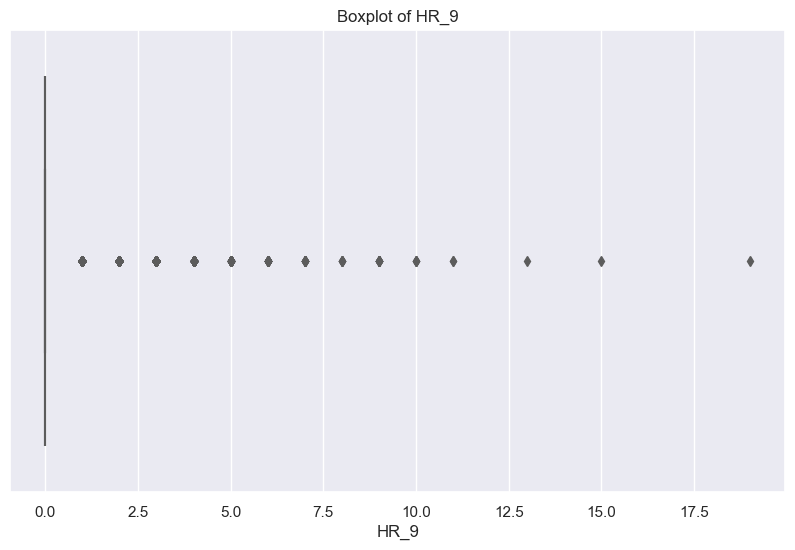

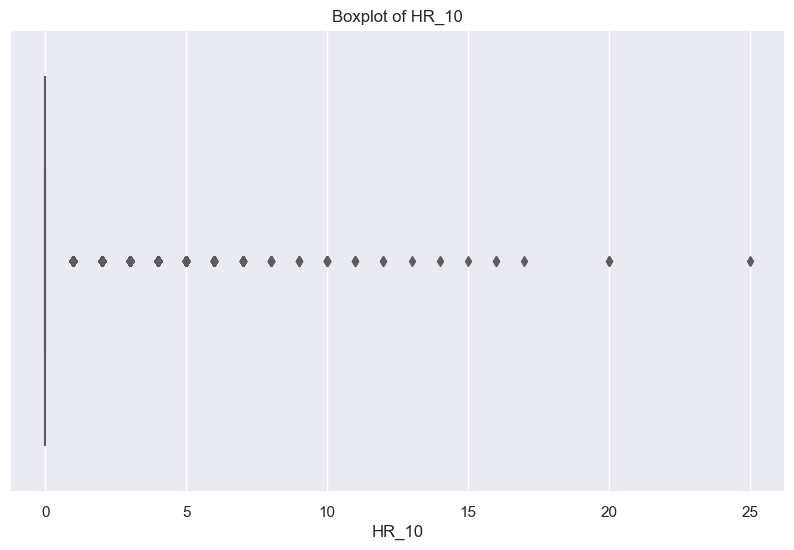

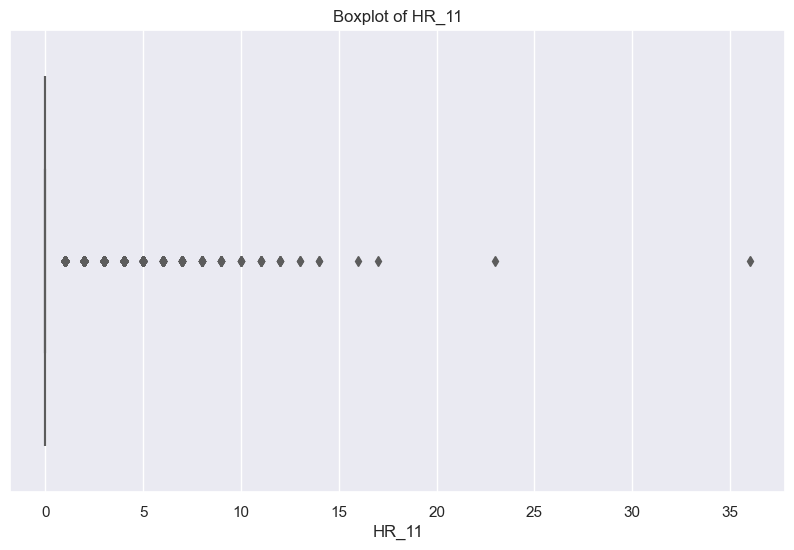

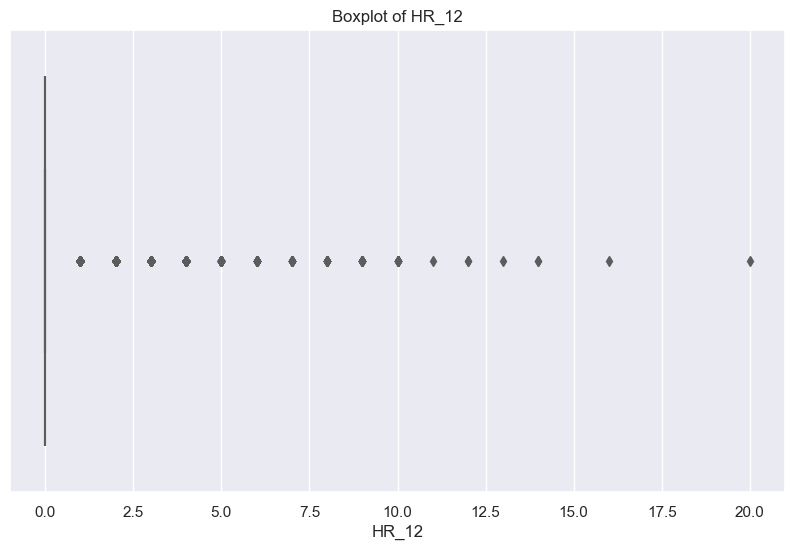

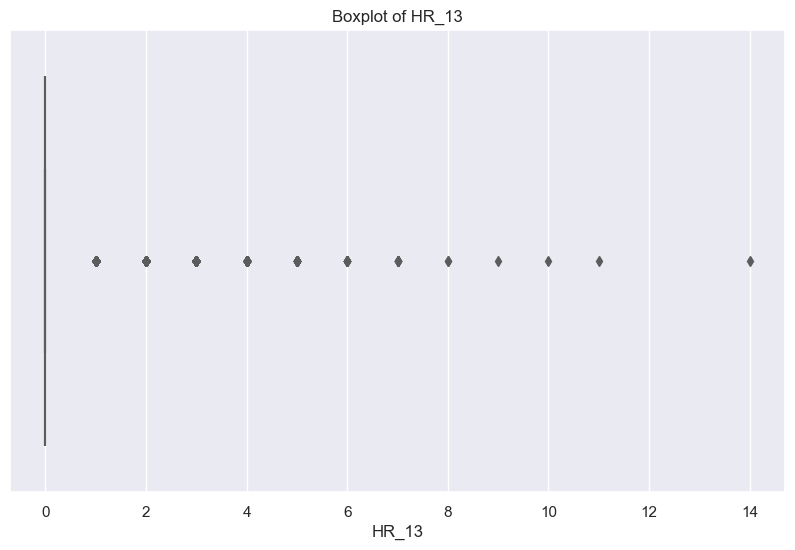

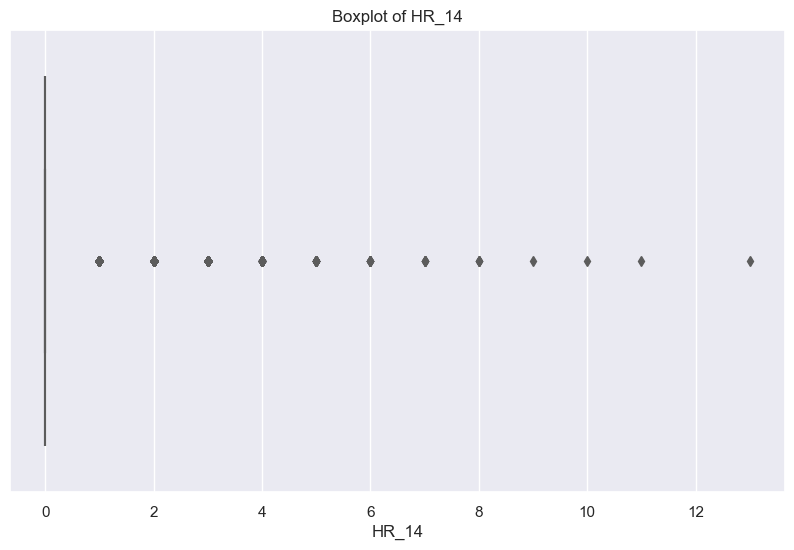

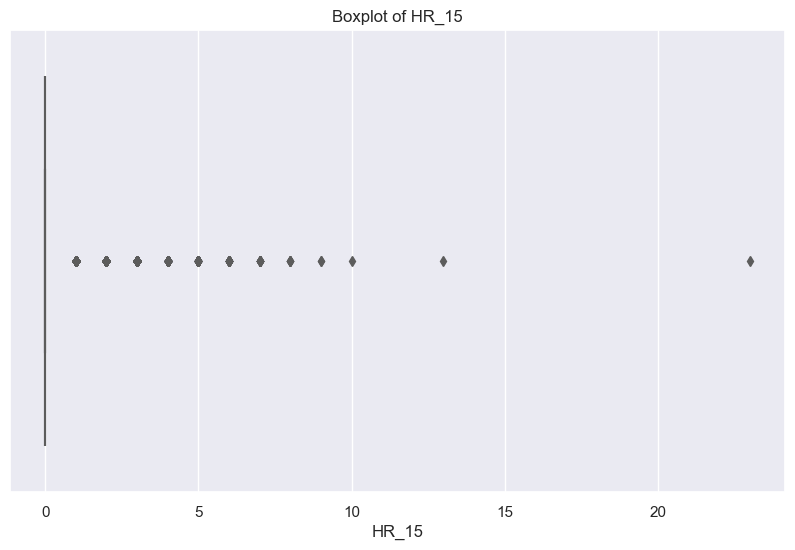

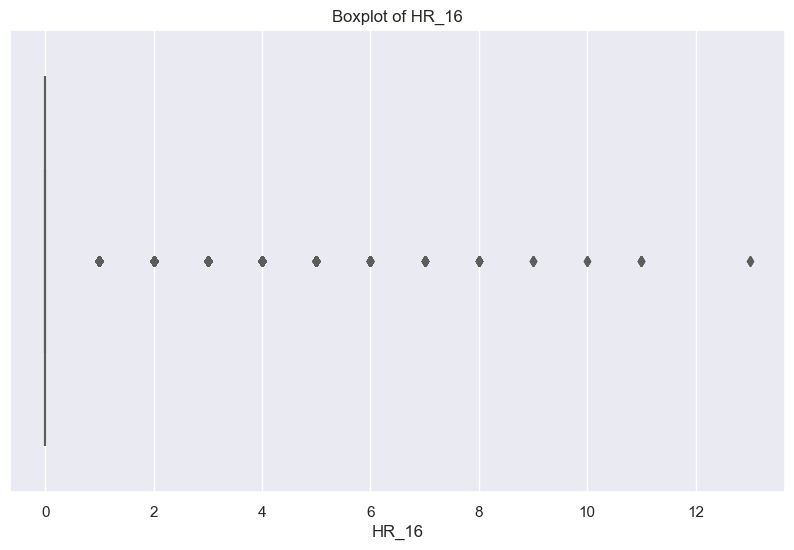

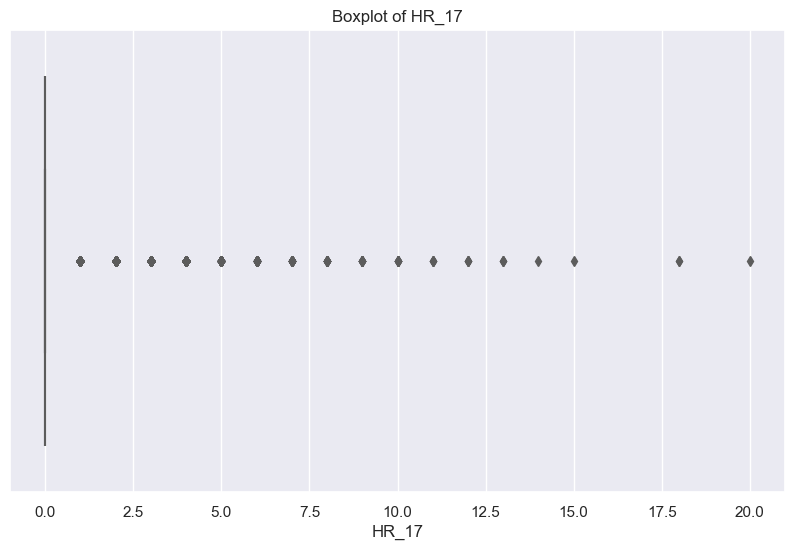

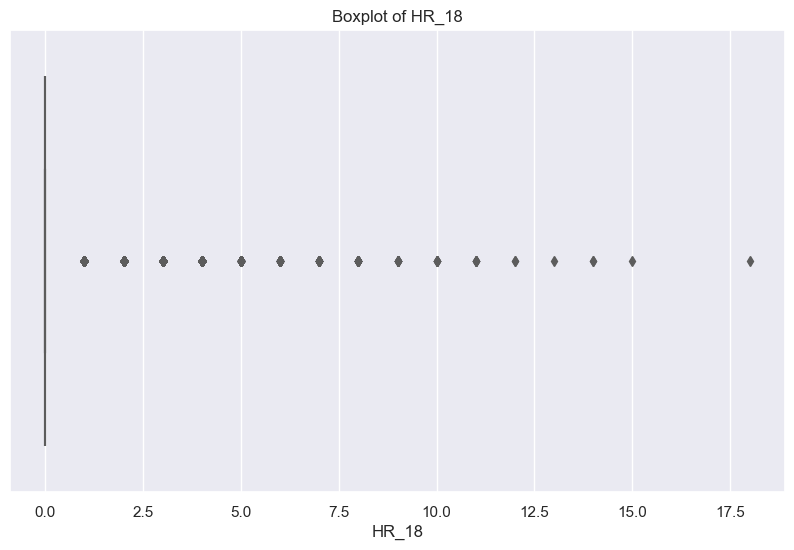

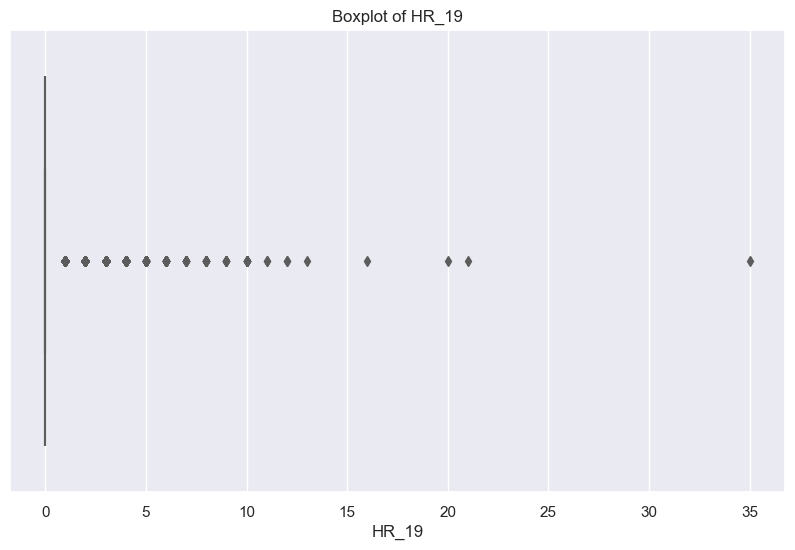

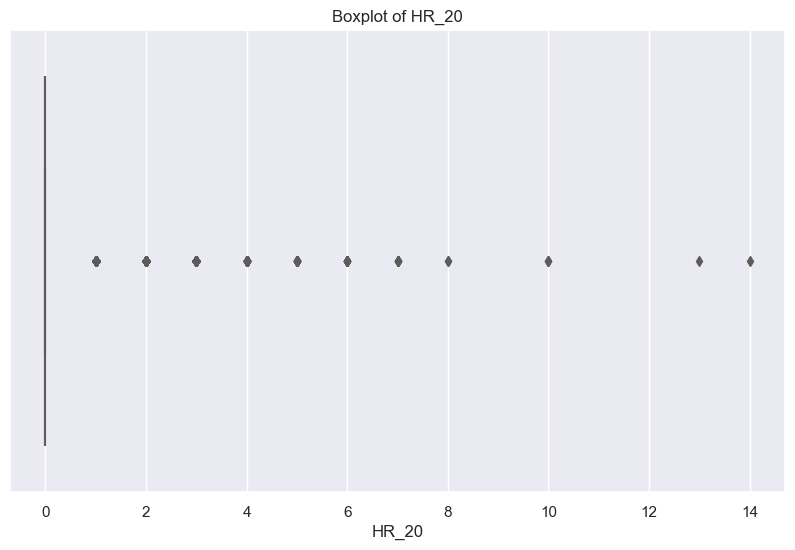

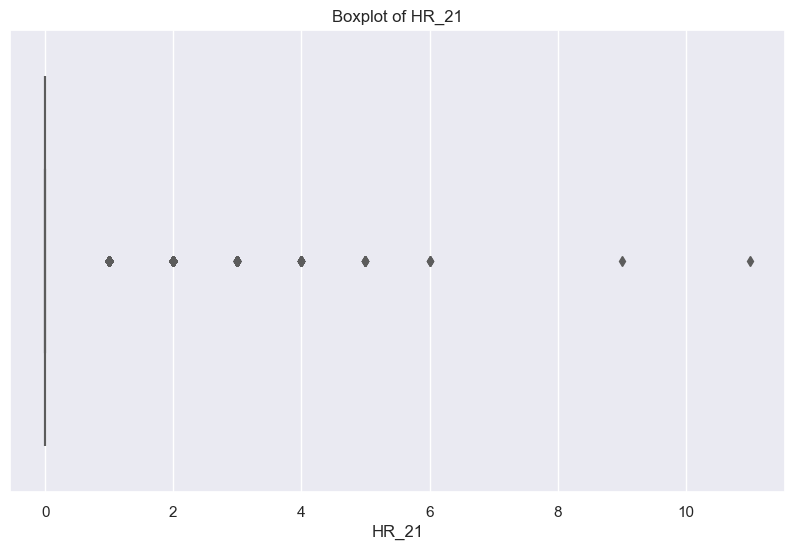

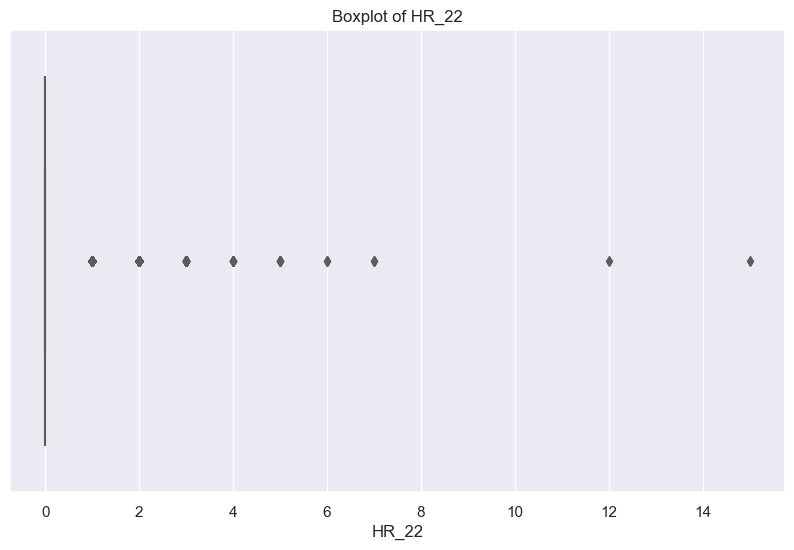

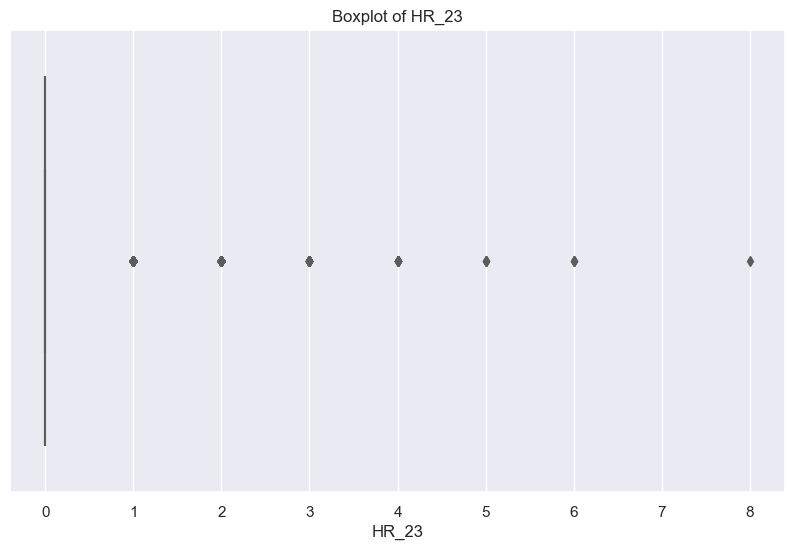

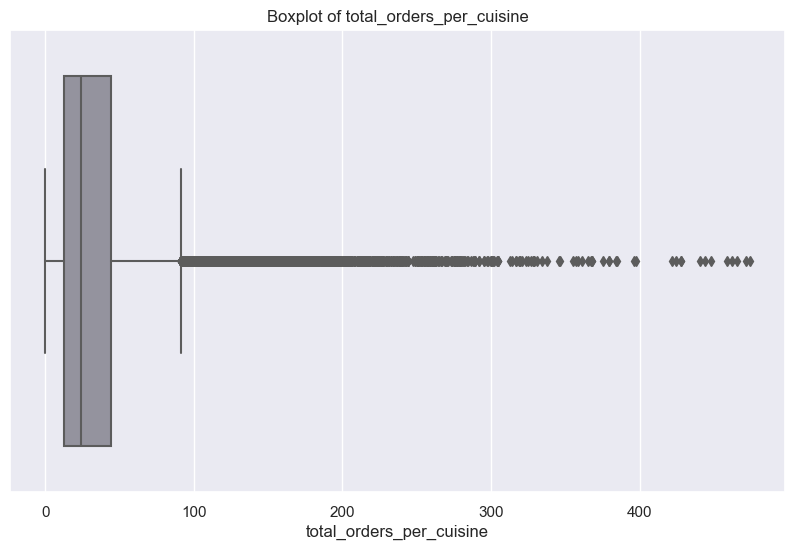

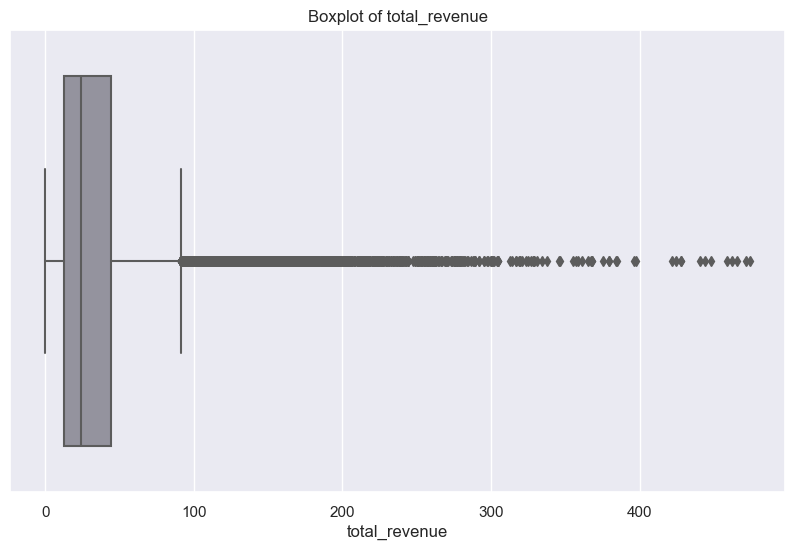

In [ ]:
for feature in metric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_filtered, x=feature, color="#9391A0")
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)
    plt.show()

## Hierarchical Clustering

## 